<a href="https://colab.research.google.com/github/moha09-coder/Salary-Gaps-Analysis/blob/moe-branch/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

# **Data Import & Cleaning**

In [ ]:
df = pd.read_csv('data/salaries_data.csv')
print(f"The data contains {df.shape[0]} rows and {df.shape[1]} columns.")

The data contains 2649 rows and 18 columns.


In [ ]:
df.head()

,Timestamp,Gender,Degree,BusinessMarket,ProgrammingLanguages,BusinessSize,Title,Level,Yoe,YoeBuckets,TotalCompensationEgp,WorkSetting,BusinessFocus,BusinessLine,TotalCompensationEgpBuckets,Industries,IsEgp,CompanyLocation
0,4/2/2024 11:10:37,Male,Yes,NaN,"PHP, JavaScript, TypeScript, HTML/CSS",A Small and Medium Enterprise,Backend Engineer,Mid-level,5.0,3-5,"42,437.50",Hybrid,Outsourcing Company,B2B & B2C lines,40-50K,"Fintech, Technology",Another currency (e.g USD),Cairo
1,4/2/2024 11:12:13,Male,Yes,NaN,"TypeScript, HTML/CSS",A Small and Medium Enterprise,Frontend Engineer,Mid-level,2.5,1-3,"20,000.00",Hybrid,Product-based company,B2B,20-25K,Human Resources Services,EGP,Cairo
2,4/2/2024 11:15:17,Female,Yes,Global,NaN,A Small and Medium Enterprise,UI/UX Designer/Engineer,Mid-level,2.5,1-3,"42,000.00",Remote/Egypt,Product-based company,B2B,40-50K,Technology,EGP,Cairo
3,4/2/2024 11:18:12,Male,Yes,NaN,"PHP, JavaScript",A Large Enterprise/Multinational Company,Backend Engineer,Junior,1.0,0-1,"16,000.00",Hybrid,Product-based company,B2B,15-20K,Lead Gathering,EGP,Alexandria
4,4/2/2024 11:19:20,Male,Yes,NaN,"JavaScript, TypeScript",A Start-up,Backend Engineer,Senior,2.0,1-3,"101,850.00",Hybrid,Product-based company,B2B & B2C lines,100-120K,"Automotive, Transportation",Another currency (e.g USD),No site in Egypt


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    2649 non-null   object 
 1   Gender                       2649 non-null   object 
 2   Degree                       2649 non-null   object 
 3   BusinessMarket               2088 non-null   object 
 4   ProgrammingLanguages         2227 non-null   object 
 5   BusinessSize                 2649 non-null   object 
 6   Title                        2649 non-null   object 
 7   Level                        2649 non-null   object 
 8   Yoe                          2649 non-null   float64
 9   YoeBuckets                   2649 non-null   object 
 10  TotalCompensationEgp         2649 non-null   object 
 11  WorkSetting                  2649 non-null   object 
 12  BusinessFocus                2649 non-null   object 
 13  BusinessLine      

,Yoe
count,2649.000000
mean,3.577931
std,3.468985
min,0.000000
25%,1.000000
50%,2.500000
75%,4.500000
max,31.000000


In [ ]:
# Renaming columns for better readability
df.rename(columns={
  'Yoe': 'YearsOfExperience',
  'TotalCompensationEgp': 'Salary'
}, inplace=True)

# Dropping unnecessary columns
df.drop(columns=['Timestamp', 'TotalCompensationEgpBuckets', 'YoeBuckets'], inplace=True)

# Converting Salary to a float
df['Salary'] = (
    df['Salary']
    .replace('[,]', '', regex=True)  # Remove commas
    .astype(float)
)

# Remove rows where Salary is zero or missing
df = df[df['Salary'].notna() & (df['Salary'] != 0)]

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2643 entries, 0 to 2648
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                2643 non-null   object 
 1   Degree                2643 non-null   object 
 2   BusinessMarket        2083 non-null   object 
 3   ProgrammingLanguages  2221 non-null   object 
 4   BusinessSize          2643 non-null   object 
 5   Title                 2643 non-null   object 
 6   Level                 2643 non-null   object 
 7   YearsOfExperience     2643 non-null   float64
 8   Salary                2643 non-null   float64
 9   WorkSetting           2643 non-null   object 
 10  BusinessFocus         2643 non-null   object 
 11  BusinessLine          2643 non-null   object 
 12  Industries            2417 non-null   object 
 13  IsEgp                 2643 non-null   object 
 14  CompanyLocation       2038 non-null   object 
dtypes: float64(2), object(13)


,YearsOfExperience,Salary
count,2643.000000,2.643000e+03
mean,3.580378,5.529055e+04
std,3.468751,2.061977e+05
min,0.000000,1.200000e+01
25%,1.000000,1.697500e+04
50%,2.500000,3.000000e+04
75%,4.750000,5.628450e+04
max,31.000000,9.263500e+06


Since the maximum salary here is very extreme (9,263,500 EGP), we are going to drop the values above the 99th percentile for a better clarity of our visualizations.

In [ ]:
# Keep only rows with Salary below the 99th percentile
salary_99 = df['Salary'].quantile(0.99)
filtered_df = df[df['Salary'] <= salary_99]

df = filtered_df
print(f"After filtering, the data contains {filtered_df.shape[0]} rows and {filtered_df.shape[1]} columns. We removed only {df.shape[0] - filtered_df.shape[0]} rows of very extreme values.")

After filtering, the data contains 2616 rows and 15 columns. We removed only 0 rows of very extreme values.


In [ ]:
# Remove all `and`s in the programming language column, making it easier to split
df["ProgrammingLanguages"] = df["ProgrammingLanguages"].str.replace(" and ", ", ", regex=False) # remove all ands

# **Descriptive Analysis**
For the rest of our analysis, we are going to split the data into two parts. A part where the salary is in EGP, and another where the salary is in any other currencey.

**However, we are going to be mainly focusing on the salaries in EGP**.

### Splitting data based on currencey

First, we split our data into three different dataframes based on the currencey.

In [ ]:
egp_salary_df = df[(df['IsEgp'] == "EGP") & (df['CompanyLocation'] != "No site in Egypt")]
non_egp_salary_df = df[(df['IsEgp'] != "EGP")]
all_salary_df = df.copy()

print(f"EGP Salary DataFrame shape: {egp_salary_df.shape}")
print(f"Non-EGP Salary DataFrame shape: {non_egp_salary_df.shape}")
print(f"All Salary DataFrame shape: {all_salary_df.shape}")

EGP Salary DataFrame shape: (1793, 15)
Non-EGP Salary DataFrame shape: (768, 15)
All Salary DataFrame shape: (2616, 15)


### 5-number summary for Salary and Years of Experience

The first step of our analysis is doing a 5-number summary for all quantitative variables, in our case these are Salary and Years of Experience only.

In [ ]:
salary_min = egp_salary_df['Salary'].min()
salary_q1 = egp_salary_df['Salary'].quantile(0.25)
salary_median = egp_salary_df['Salary'].median()
salary_q3 = egp_salary_df['Salary'].quantile(0.75)
salary_max = egp_salary_df['Salary'].max()

yoe_min = egp_salary_df['YearsOfExperience'].min()
yoe_q1 = egp_salary_df['YearsOfExperience'].quantile(0.25)
yoe_median = egp_salary_df['YearsOfExperience'].median()
yoe_q3 = egp_salary_df['YearsOfExperience'].quantile(0.75)
yoe_max = egp_salary_df['YearsOfExperience'].max()

print("5-number summary for Salary (EGP):")
print(f"Min: {salary_min:.2f}")
print(f"Q1: {salary_q1:.2f}")
print(f"Median: {salary_median:.2f}")
print(f"Q3: {salary_q3:.2f}")
print(f"Max: {salary_max:.2f}\n")

print("5-number summary for Years of Experience:")
print(f"Min: {yoe_min:.2f}")
print(f"Q1: {yoe_q1:.2f}")
print(f"Median: {yoe_median:.2f}")
print(f"Q3: {yoe_q3:.2f}")
print(f"Max: {yoe_max:.2f}")

5-number summary for Salary (EGP):
Min: 12.00
Q1: 15000.00
Median: 24000.00
Q3: 40000.00
Max: 330000.00

5-number summary for Years of Experience:
Min: 0.00
Q1: 1.00
Median: 2.00
Q3: 4.00
Max: 31.00


<ipython-input-128-6edfa877ef66>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=egp_salary_df, x='Salary', palette='pastel')
<ipython-input-128-6edfa877ef66>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=egp_salary_df, x='YearsOfExperience', palette='pastel')


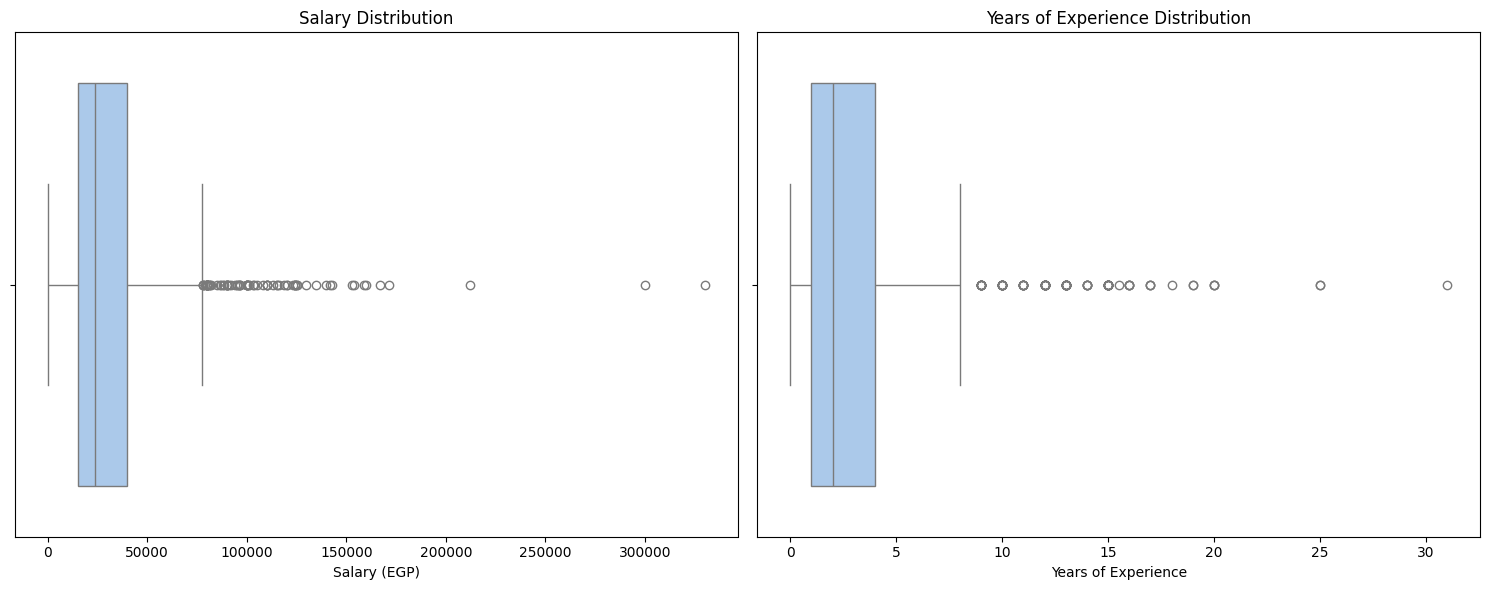


Salary Summary Statistics:
count      1793.000000
mean      30800.649805
std       25443.870554
min          12.000000
25%       15000.000000
50%       24000.000000
75%       40000.000000
max      330000.000000
Name: Salary, dtype: float64

Years of Experience Summary Statistics:
count    1793.000000
mean        3.103876
std         3.119074
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        31.000000
Name: YearsOfExperience, dtype: float64


In [ ]:
# Create a figure with two subplots side by side
plt.figure(figsize=(15, 6))

# First subplot for Salary
plt.subplot(121)
sns.boxplot(data=egp_salary_df, x='Salary', palette='pastel')
plt.title('Salary Distribution')
plt.xlabel('Salary (EGP)')
plt.ticklabel_format(style='plain', axis='x')

# Second subplot for Years of Experience
plt.subplot(122)
sns.boxplot(data=egp_salary_df, x='YearsOfExperience', palette='pastel')
plt.title('Years of Experience Distribution')
plt.xlabel('Years of Experience')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Print summary statistics for both variables
print("\nSalary Summary Statistics:")
print(egp_salary_df['Salary'].describe())
print("\nYears of Experience Summary Statistics:")
print(egp_salary_df['YearsOfExperience'].describe())

### Outlier analysis for Salary and Years of Experience

Then, we can look into the number of outliers in the data.

In [ ]:
# Calculate IQR for Salary
salary_Q1 = egp_salary_df['Salary'].quantile(0.25)
salary_Q3 = egp_salary_df['Salary'].quantile(0.75)
salary_IQR = salary_Q3 - salary_Q1

# Calculate IQR for Years of Experience
yoe_Q1 = egp_salary_df['YearsOfExperience'].quantile(0.25)
yoe_Q3 = egp_salary_df['YearsOfExperience'].quantile(0.75)
yoe_IQR = yoe_Q3 - yoe_Q1

# Outlier conditions
salary_outliers = egp_salary_df[(egp_salary_df['Salary'] < (salary_Q1 - 1.5 * salary_IQR)) | (egp_salary_df['Salary'] > (salary_Q3 + 1.5 * salary_IQR))]
yoe_outliers = egp_salary_df[(egp_salary_df['YearsOfExperience'] < (yoe_Q1 - 1.5 * yoe_IQR)) | (egp_salary_df['YearsOfExperience'] > (yoe_Q3 + 1.5 * yoe_IQR))]

print(f"Salary IQR: {salary_IQR:.2f} (Q1: {salary_Q1:.2f}, Q3: {salary_Q3:.2f})")
print(f"Number of outliers in Salary: {salary_outliers.shape[0]}")
print(f"Years of Experience IQR: {yoe_IQR:.2f} (Q1: {yoe_Q1:.2f}, Q3: {yoe_Q3:.2f})")
print(f"Number of outliers in Years of Experience: {yoe_outliers.shape[0]}")

Salary IQR: 25000.00 (Q1: 15000.00, Q3: 40000.00)
Number of outliers in Salary: 80
Years of Experience IQR: 3.00 (Q1: 1.00, Q3: 4.00)
Number of outliers in Years of Experience: 93


### Visualization of IQR in both Salary and Years of Experience

Now, we want to look into the distirbution for both of our quantitative variables Salary and Years of Experience.

**Note**: since those two columns contains a big amount of outliers, we are going to stick to the IQR in their representations in order to see the data clearly.

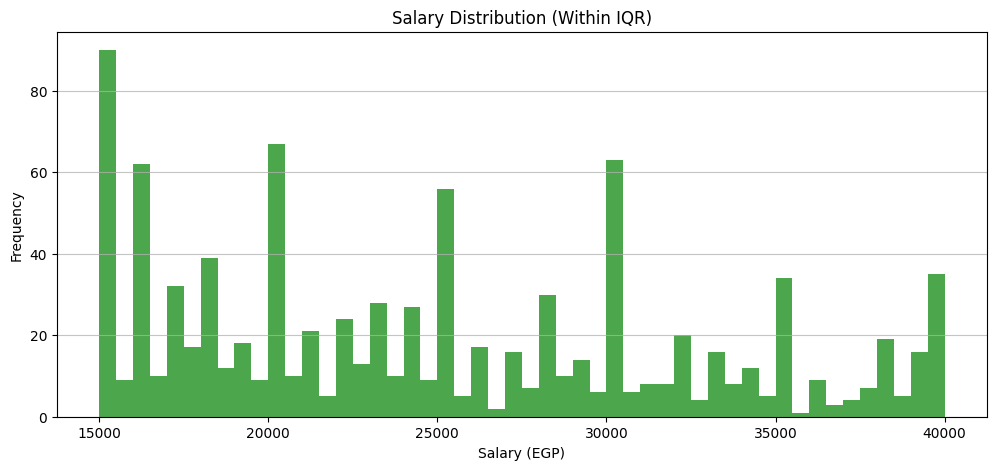

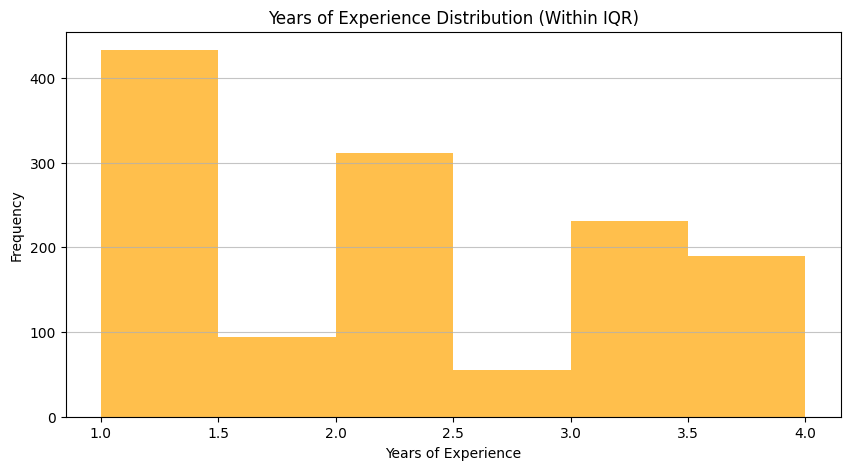

In [ ]:
# Filter data within IQR for both Salary and Years of Experience
salary_IQR_df = egp_salary_df[(egp_salary_df['Salary'] >= salary_Q1) & (egp_salary_df['Salary'] <= salary_Q3)]
yoe_IQR_df =  egp_salary_df[(egp_salary_df['YearsOfExperience'] >= yoe_Q1) & (egp_salary_df['YearsOfExperience'] <= yoe_Q3)]

# Visualize Salary and Years of Experience within IQR
plt.figure(figsize=(12,5))
plt.hist(salary_IQR_df['Salary'], bins=50, color='green', alpha=0.7)
plt.title('Salary Distribution (Within IQR)')
plt.xlabel('Salary (EGP)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(10,5))
plt.hist(yoe_IQR_df['YearsOfExperience'], bins=6, color='orange', alpha=0.7)
plt.title('Years of Experience Distribution (Within IQR)')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='y', alpha=0.75)
plt.show()



It's clear from salary distribution that it is multimodal which reflects the prescence of cofactor variables like years of experience, job level, etc.

To have a better understanding of the difference in Salaries and Years of Experience between males and females, we respresent them using side-by-side histograms.

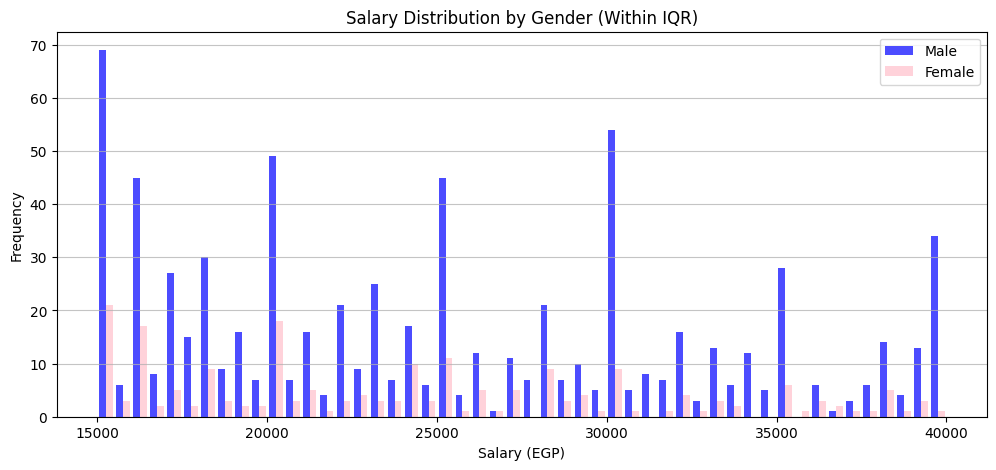

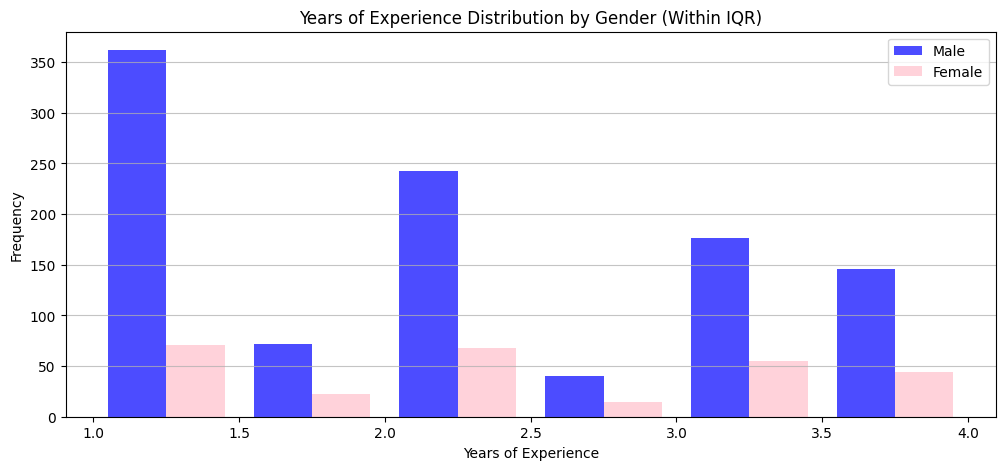

In [ ]:
# Plot salary distribution by gender
plt.figure(figsize=(12,5))
plt.hist([salary_IQR_df[salary_IQR_df['Gender']=='Male']['Salary'],
          salary_IQR_df[salary_IQR_df['Gender']=='Female']['Salary']],
         bins=50, label=['Male', 'Female'],
         color=['blue', 'pink'], alpha=0.7)
plt.title('Salary Distribution by Gender (Within IQR)')
plt.xlabel('Salary (EGP)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

# Define exact bin edges
plt.figure(figsize=(12,5))
plt.hist([yoe_IQR_df[yoe_IQR_df['Gender']=='Male']['YearsOfExperience'],
          yoe_IQR_df[yoe_IQR_df['Gender']=='Female']['YearsOfExperience']],
         bins=6, label=['Male', 'Female'],
         color=['blue', 'pink'], alpha=0.7)
plt.title('Years of Experience Distribution by Gender (Within IQR)')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()


### Correlation between Salary and Years of Experience

Let's check the correlation between both of our quantitative values, which are Salaries and Years of Experience.

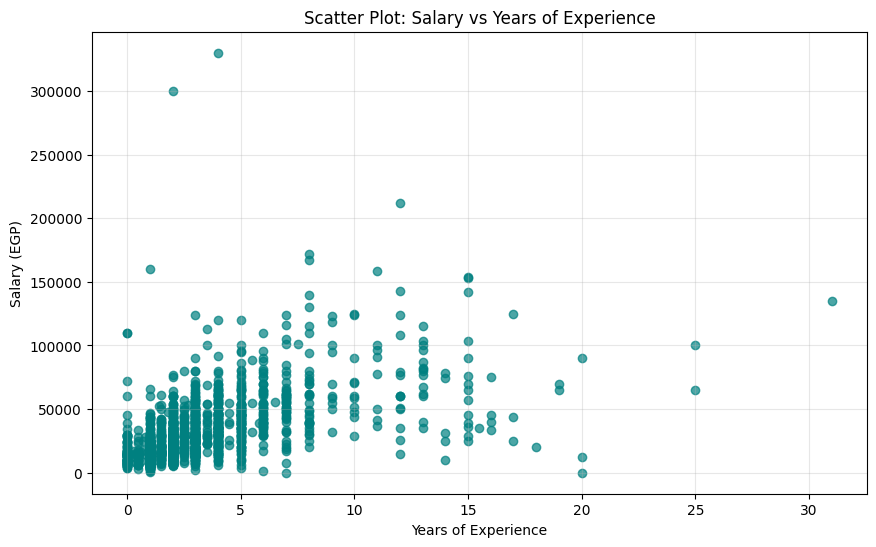

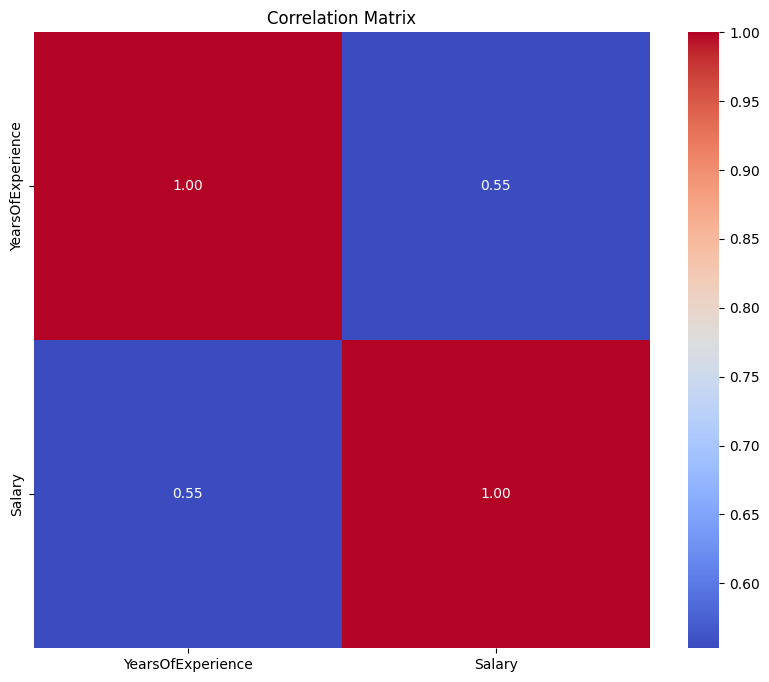

In [ ]:
# Scatter plot of Salary vs Years of Experience
plt.figure(figsize=(10,6))
plt.scatter(
    egp_salary_df['YearsOfExperience'],
    egp_salary_df['Salary'],
    alpha=0.7,
    color='teal'
)
plt.title('Scatter Plot: Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (EGP)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=0.3)
plt.show()

# Correlation matrix (only numeric columns, Salary and Years of Experience)
plt.figure(figsize=(10,8))
numeric_df = egp_salary_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

The data in the scatterplot seems to be somewhat linear, with a moderate correlation factor of 0.55. Which means that there may exist sort of relationship between Salaries and Years of Experience.

### Visualization of Salaries by Gender

Let's the count of Males and Females in our dataset, and in addition, visualize the Salary per each Gender in a box-plot.  

<ipython-input-133-3d000c64d57c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=egp_salary_df, x='Gender', palette='pastel')


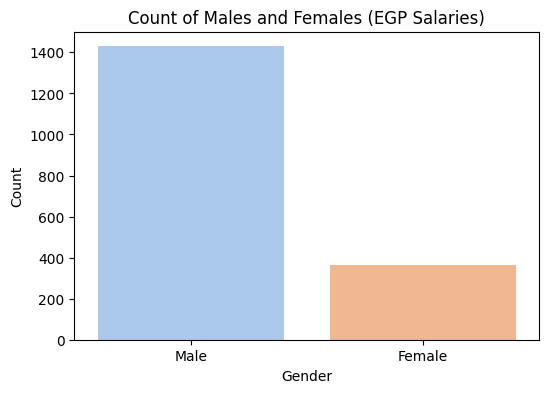

<ipython-input-133-3d000c64d57c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=egp_salary_df, x='Gender', y='Salary', palette='pastel')


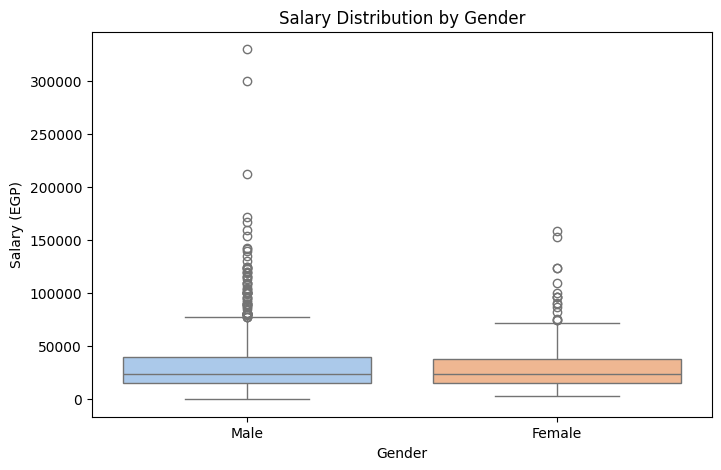

<ipython-input-133-3d000c64d57c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=egp_salary_df, x='Gender', y='YearsOfExperience', palette='pastel')


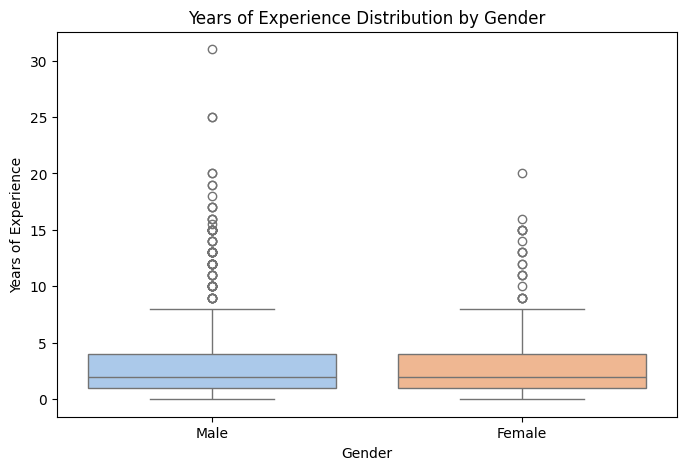

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=egp_salary_df, x='Gender', palette='pastel')
plt.title('Count of Males and Females (EGP Salaries)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=egp_salary_df, x='Gender', y='Salary', palette='pastel')
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary (EGP)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(data=egp_salary_df, x='Gender', y='YearsOfExperience', palette='pastel')
plt.title('Years of Experience Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Years of Experience')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The ratio between working men and women in the tech industry is reflected in the first diagram. According to this [report](https://www.statista.com/statistics/1446245/worldwide-developer-gender-distribution/), women represent 20% of the software engineering firm.

Also, from box plot, we can see that the median salary for men and women is almost similar, although the number of men is almost 4 times the number of women.

To get a more clear answer regarding that observation, we can carry out a box plot within the IQR only.

<ipython-input-134-c8fbd5965f1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=salary_IQR_df, x='Gender', y='Salary', palette='pastel')


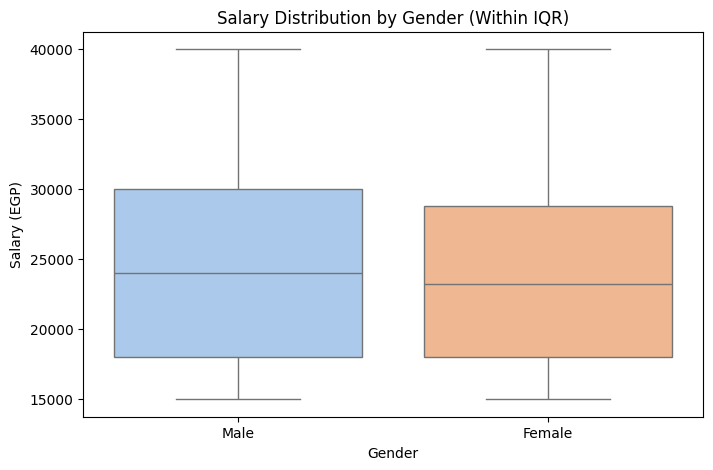

<ipython-input-134-c8fbd5965f1d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=salary_IQR_df, x='Gender', y='YearsOfExperience', palette='pastel')


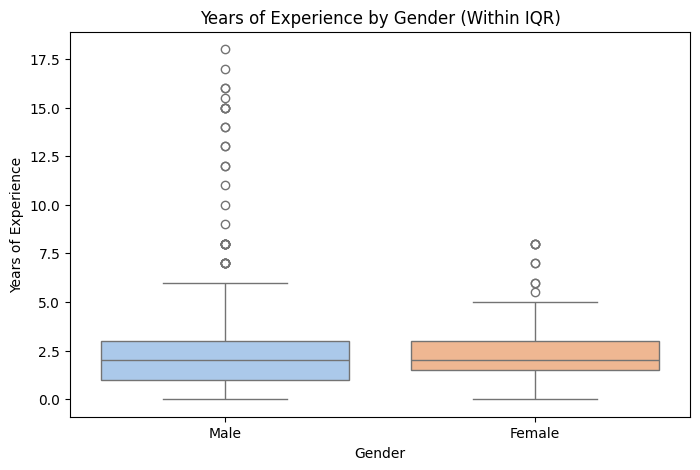

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=salary_IQR_df, x='Gender', y='Salary', palette='pastel')
plt.title('Salary Distribution by Gender (Within IQR)')
plt.xlabel('Gender')
plt.ylabel('Salary (EGP)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=salary_IQR_df, x='Gender', y='YearsOfExperience', palette='pastel')
plt.title('Years of Experience by Gender (Within IQR)')
plt.xlabel('Gender')
plt.ylabel('Years of Experience')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

By getting rid of all outliers and checking a boxplot of the IQR Salaries per Gender, we can confirm that the median Salaries across genders is almost equal.

### Visualization of Count by Level

Following through with our descriptive analysis, we want to check the number of males/females in each professional Level.

<ipython-input-135-998599231351>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=egp_salary_df, x='Level', palette='Set2', order=egp_salary_df['Level'].value_counts().index)


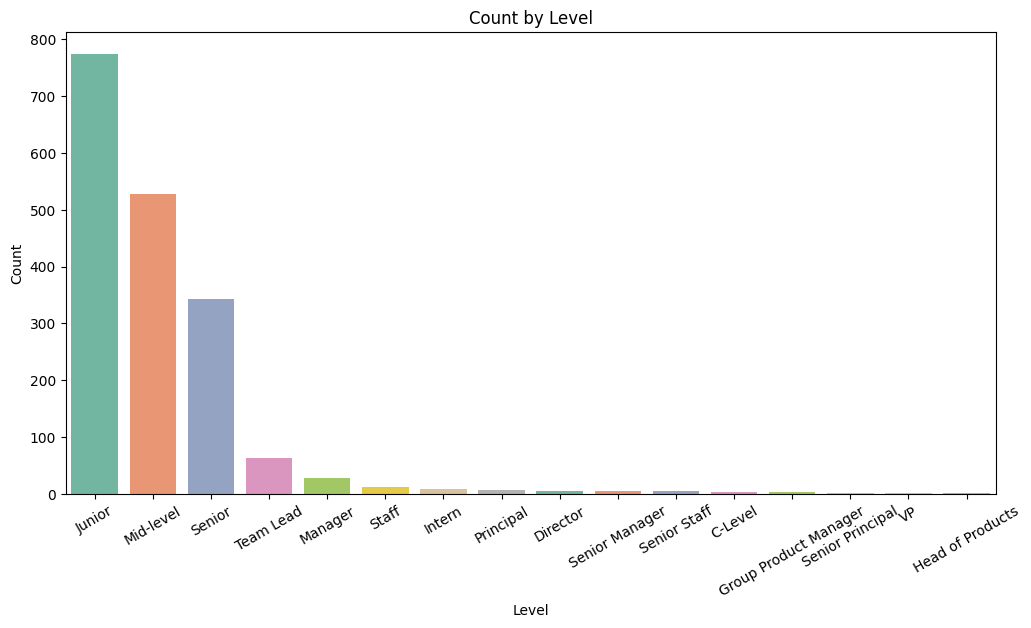

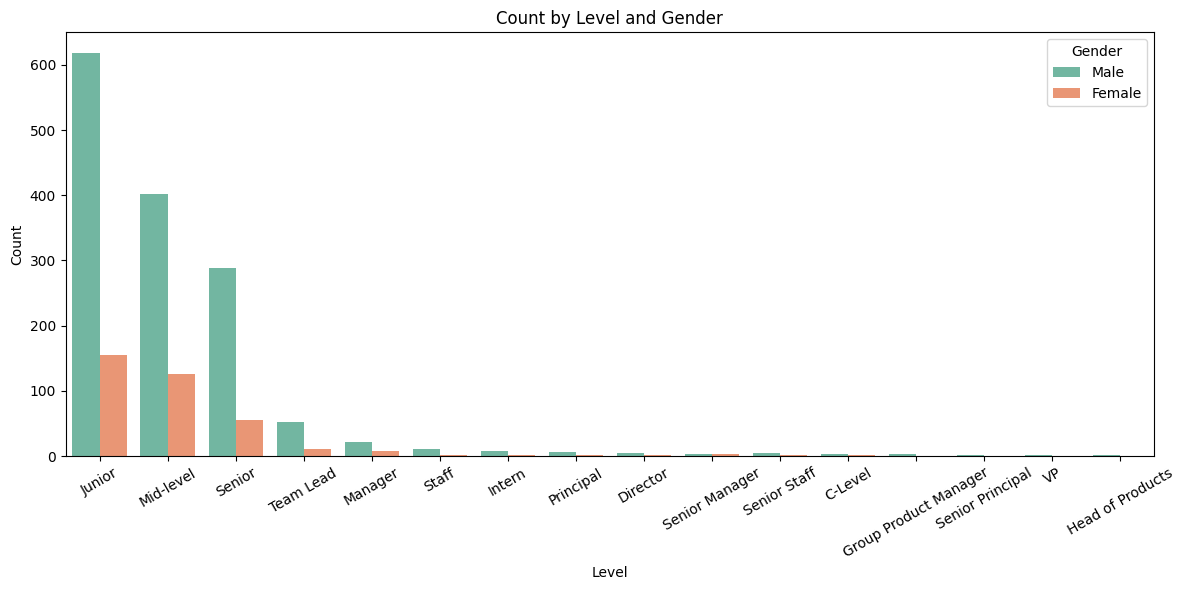

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=egp_salary_df, x='Level', palette='Set2', order=egp_salary_df['Level'].value_counts().index)
plt.title('Count by Level')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=egp_salary_df, x='Level', hue='Gender', palette='Set2',
              order=egp_salary_df['Level'].value_counts().index)
plt.title('Count by Level and Gender')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Gender')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

We can tell that males accquire the majority of all job levels.

### Visualization of Salaries by Level

We want to check the Salaries per each Job Level in our dataset.

<ipython-input-136-e0454395388e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=egp_salary_df, x='Level', y='Salary', palette='Set2', order=egp_salary_df['Level'].value_counts().index)


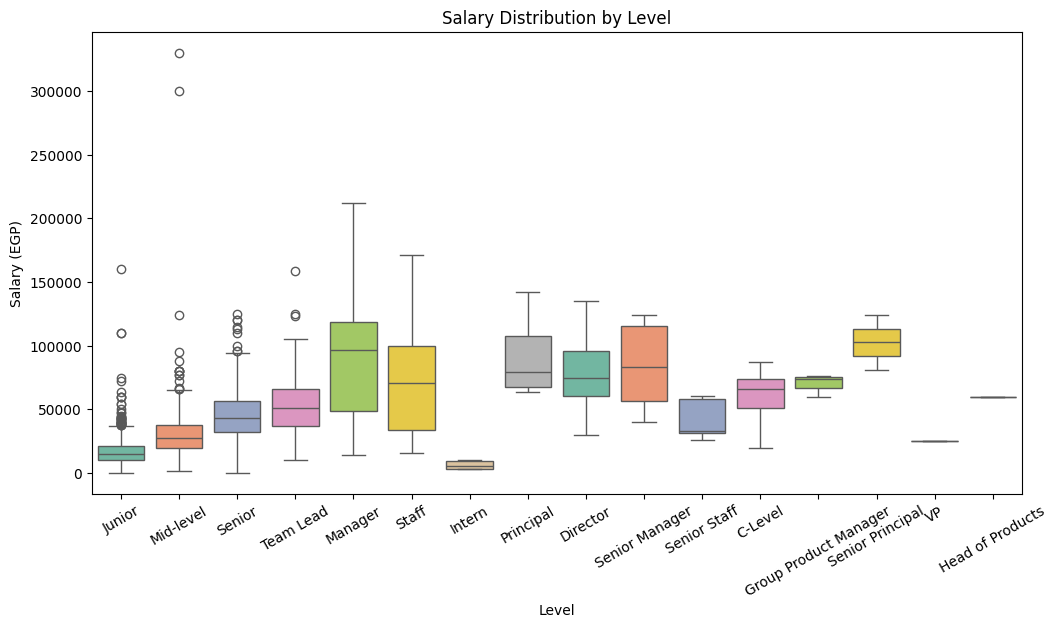

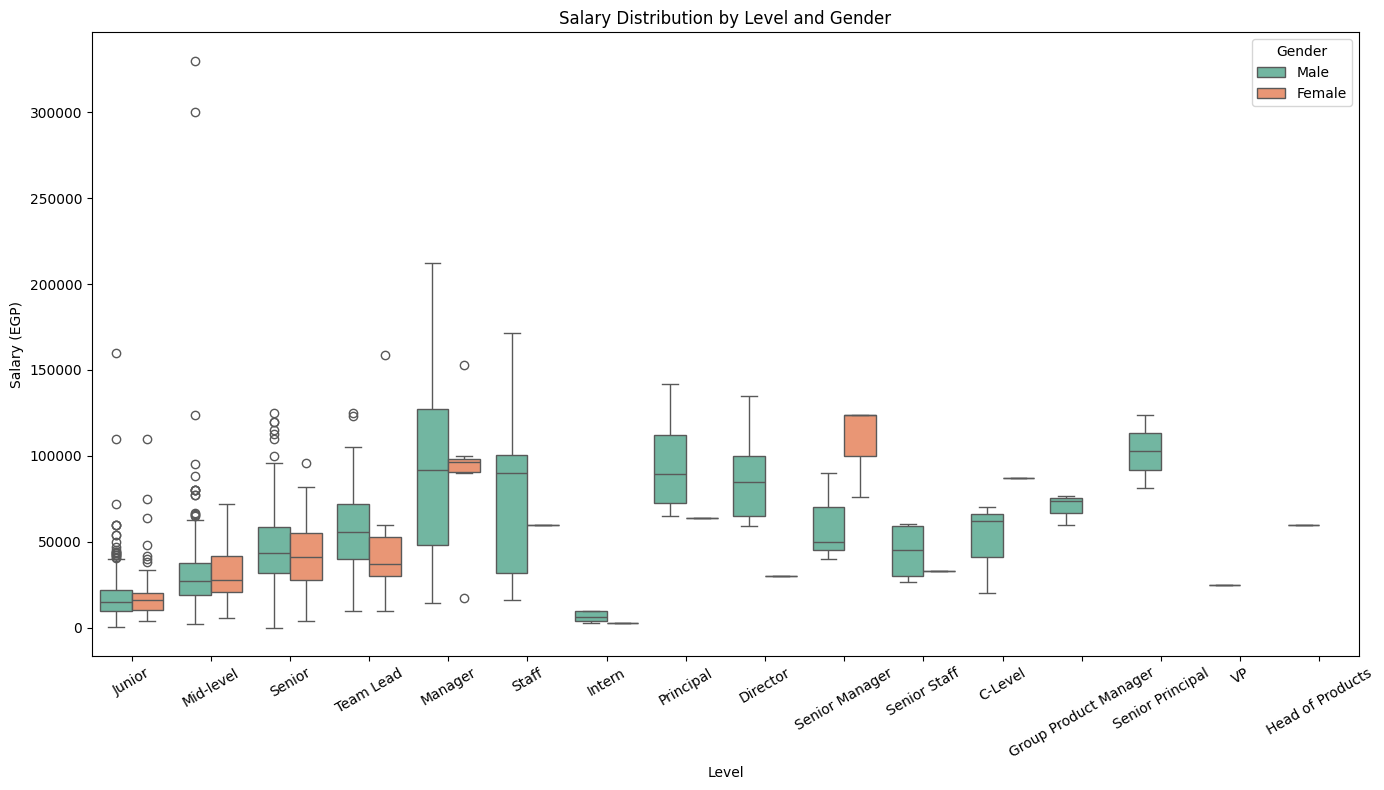

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=egp_salary_df, x='Level', y='Salary', palette='Set2', order=egp_salary_df['Level'].value_counts().index)
plt.title('Salary Distribution by Level')
plt.xlabel('Level')
plt.ylabel('Salary (EGP)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=30)
plt.show()

level_order = egp_salary_df['Level'].value_counts().index

plt.figure(figsize=(14,8))
sns.boxplot(data=egp_salary_df, x='Level', y='Salary', hue='Gender',
            order=level_order, palette='Set2', width=0.8)

plt.title('Salary Distribution by Level and Gender')
plt.xlabel('Level')
plt.ylabel('Salary (EGP)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=30)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


It is clear from the first diagram, that the three most paying levels are Manager, Senior Manager, and Group Product Manager. This leads us to assume that "management" jobs usually come with the biggest paycheck.

From the second diagram, we see that in the majority of Levels men earn a more rewarding Salary then women.

### Visualization of Salary vs Years of Experience by Gender

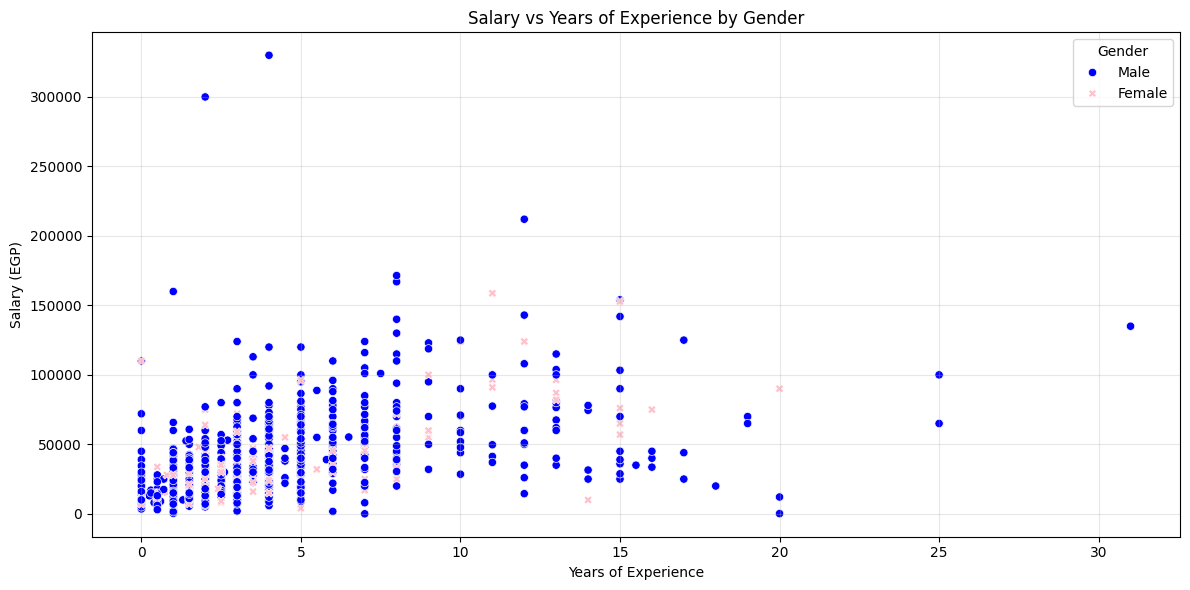

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=egp_salary_df,
                x='YearsOfExperience',
                y='Salary',
                hue='Gender',
                style='Gender',
                palette=['blue', 'pink'])

plt.title('Salary vs Years of Experience by Gender')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (EGP)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=0.3)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

### Visualization of the top 10 Job Titles with Highest Average Salaries

Let's check what are the top 10 most paying jobs in the dataset, and how different is the average pay of these jobs per gender.

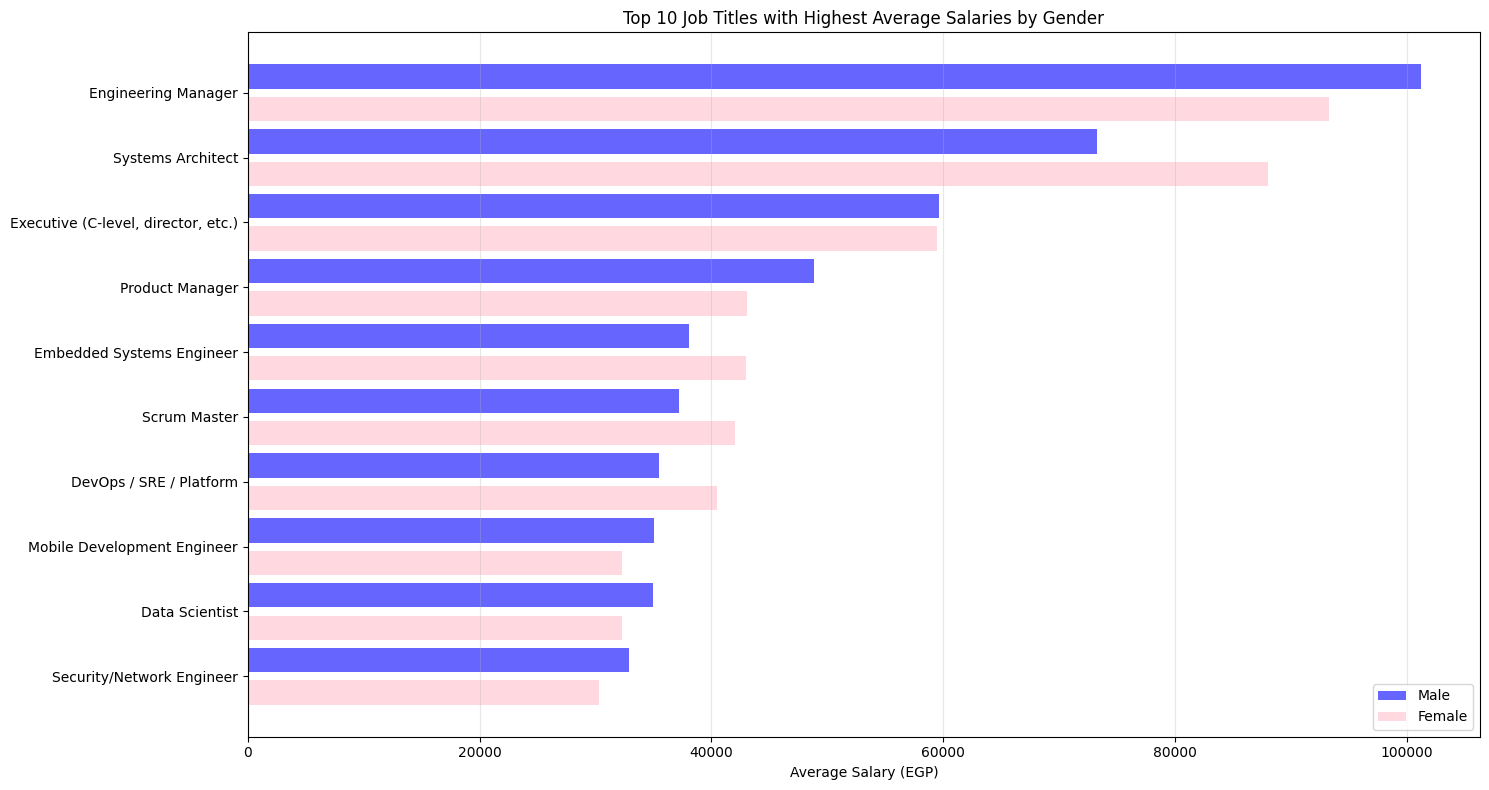

In [ ]:
males_top_10_avg = (
    egp_salary_df[egp_salary_df['Gender'] == "Male"].groupby('Title')['Salary']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

females_top_10_avg = (
    egp_salary_df[egp_salary_df['Gender'] == "Female"].groupby('Title')['Salary']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)


plt.figure(figsize=(15,8))

# Get max value for setting x-axis limit
max_salary = max(males_top_10_avg.max(), females_top_10_avg.max())

# Create y-axis positions for the bars
y_pos = np.arange(len(males_top_10_avg)) * 0.8

# Plot male salaries
plt.barh(y_pos + 0.2, males_top_10_avg.values[::-1], height=0.3,
         color='blue', alpha=0.6, label='Male')

# Plot female salaries
plt.barh(y_pos - 0.2, females_top_10_avg.values[::-1], height=0.3,
         color='pink', alpha=0.6, label='Female')

# Customize the plot
plt.yticks(y_pos, males_top_10_avg.index[::-1])
plt.xlabel('Average Salary (EGP)')
plt.title('Top 10 Job Titles with Highest Average Salaries by Gender')
plt.legend()

# Format x-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Add grid for better readability
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Although males seem to have a bigger average salary in the top paying job across the dataset (Engineering Manager), the women secure that spot in the second most paying job which is Systems Architect, as well as a few other jobs like Embedded Systems Engineer, Scrum Master,  DevOps in which women seem to have the bigger average salary.

## Visualization of Programming Languages

In [ ]:
df_exploded = df.assign(ProgrammingLanguages=df["ProgrammingLanguages"].str.split(", ")).explode("ProgrammingLanguages") # Explode the languages column to allow one language per row
df_exploded["ProgrammingLanguages"] = df_exploded["ProgrammingLanguages"].str.strip().str.lower() # lowercase all languages and remove leading/trailing spaces
language_partitions = {
    lang: df_exploded[df_exploded["ProgrammingLanguages"] == lang]
    for lang in df_exploded["ProgrammingLanguages"].unique()
}
print(f"{len(language_partitions.keys())} unique programming languages found in the dataset.")

103 unique programming languages found in the dataset.


In [ ]:
for key, _ in language_partitions.items():
    print(f"{key}: {language_partitions[key].shape[0]}")

php: 194
javascript: 926
typescript: 676
html/css: 647
nan: 0
python: 641
java: 412
c/c++: 153
r: 17
sql: 44
c#: 381
go: 91
kotlin: 108
matlab: 1
python,: 3
ruby: 62
html/css,: 8
dart: 73
scala: 11
vba: 1
m-code: 1
swift: 72
bash script: 3
powershell: 4
bash: 13
pl/sql: 1
abap: 3
outsystems: 4
rust: 7
power bi & excel & google sheets: 1
no programming: 1
verilog / systemverilog: 1
vb.net,uipath,automationanywhere: 1
php,: 2
flutter: 2
yaml: 1
liquid: 1
not a coding job: 1
javascript,: 2
rescript: 2
shell scripting: 3
elixir: 2
no: 1
x++: 3
non: 1
spss: 1
power bi: 1
c: 1
m: 1
esql: 3
system tools: 1
tcl: 1
julia: 1
vb.net: 2
rpa: 1
lisp: 1
groovy: 2
sas: 3
vb: 2
golang: 1
pl sql: 1
no programing: 1
no programing experience required at my role: 1
appian: 1
hcl: 1
t-sql: 2
perl: 1
shell: 3
labview: 1
the product is a language developed by the company: 1
vlang: 1
low code: 1
apex: 2
system verilog: 1
dax: 2
data engineering stack: 1
node.js: 1
matlab script: 1
sql,: 1
visual scripting: 1


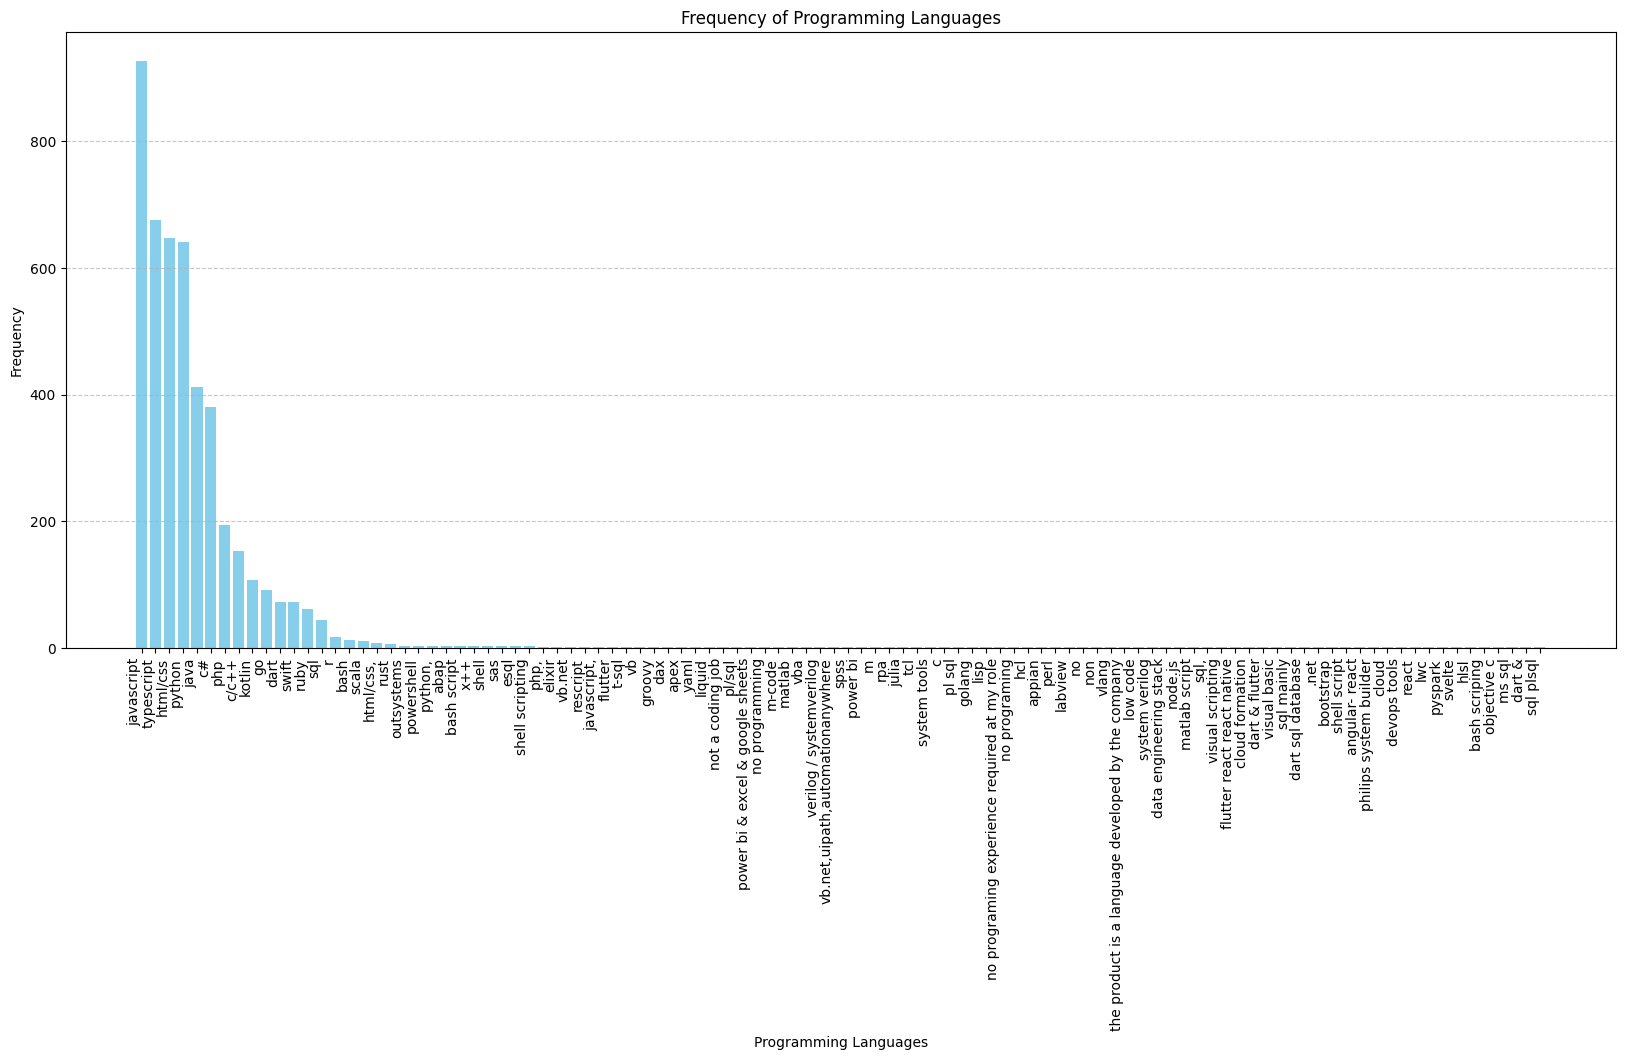

In [ ]:
# Calculate the frequency of each language
language_counts = df_exploded["ProgrammingLanguages"].value_counts()

# Plotting
plt.figure(figsize=(20, 8))
plt.bar(language_counts.index, language_counts.values, color='skyblue')
plt.xticks(rotation=90, ha='right')
plt.xlabel("Programming Languages")
plt.ylabel("Frequency")
plt.title("Frequency of Programming Languages")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Inferential Analysis**

In [ ]:
df = egp_salary_df.copy()

## 1- Welch's independant t-test on salaries for both genders.


First, let's conduct an independent T-test between means of salary and gender as a starting point
- Null hypothesis: There is no pay gap between men and women
- Alternative hypothesis: There is a pay gap between men and women
- Alpha value: 0.05


In [ ]:
# Get the complete salary arrays for both genders
men_salaries = df[df['Gender'] == 'Male']['Salary']
women_salaries = df[df['Gender'] == 'Female']['Salary']

# Calculate and print the mean salaries
mean_salary_men = men_salaries.mean()
mean_salary_women = women_salaries.mean()
print(f"Mean salary of men: {mean_salary_men:.2f}")
print(f"Mean salary of women: {mean_salary_women:.2f}")
print(f"Raw difference: {mean_salary_men - mean_salary_women:.2f}")

# Run the t-test on the full arrays of salary values
t_statistic, p_value = sp.stats.ttest_ind(men_salaries, women_salaries, equal_var=False)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Check if the p-value is less than the alpha level
if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant pay gap between men and women.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence of a pay gap between men and women.")

Mean salary of men: 31106.49
Mean salary of women: 29599.97
Raw difference: 1506.52
T-statistic: 1.1114
P-value: 0.2668
Fail to reject the null hypothesis: There is no significant evidence of a pay gap between men and women.


We then run a Practical significance test using Cohen's d effect size to verify our result.

In [ ]:
# Calculate Cohen's d effect size
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)

    # Pooled standard deviation
    pooled_sd = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))

    # Cohen's d
    d = (group1.mean() - group2.mean()) / pooled_sd
    return d

# Calculate effect size
effect_size = cohens_d(men_salaries, women_salaries)

# Print results with interpretation
print("\nPractical Significance Analysis:")
print(f"Cohen's d effect size: {effect_size:.4f}")

# Interpret the effect size
if abs(effect_size) < 0.2:
    interpretation = "negligible"
elif abs(effect_size) < 0.5:
    interpretation = "small"
elif abs(effect_size) < 0.8:
    interpretation = "medium"
else:
    interpretation = "large"

print(f"Effect size interpretation: {interpretation}")
print(f"This means the gender pay gap has a {interpretation} practical significance.")


Practical Significance Analysis:
Cohen's d effect size: 0.0592
Effect size interpretation: negligible
This means the gender pay gap has a negligible practical significance.


## 2- Blinder-Oaxaca Decomposition

Secondly, let's conduct an [Blinder-Oaxaca Decomposition](https://en.wikipedia.org/wiki/Blinder%E2%80%93Oaxaca_decomposition) test
- Null hypothesis: After controlling for all contributing factors, there is no pay gap between men and women
- Alternative hypothesis: After controlling for all contributing factors, there is a pay gap between men and women
- Alpha value: 0.05


First of all we  shall conduct regression analysis to check if the gap persists after controlling for experience and other factors.

--- Scikit-learn Linear Regression ---
Mean Squared Error (Sklearn): 334255348.42
R-squared (Sklearn): 0.35

Feature Importance (Sklearn):
             Feature  Coefficient  Abs_Coefficient
0  YearsOfExperience  4600.927482      4600.927482


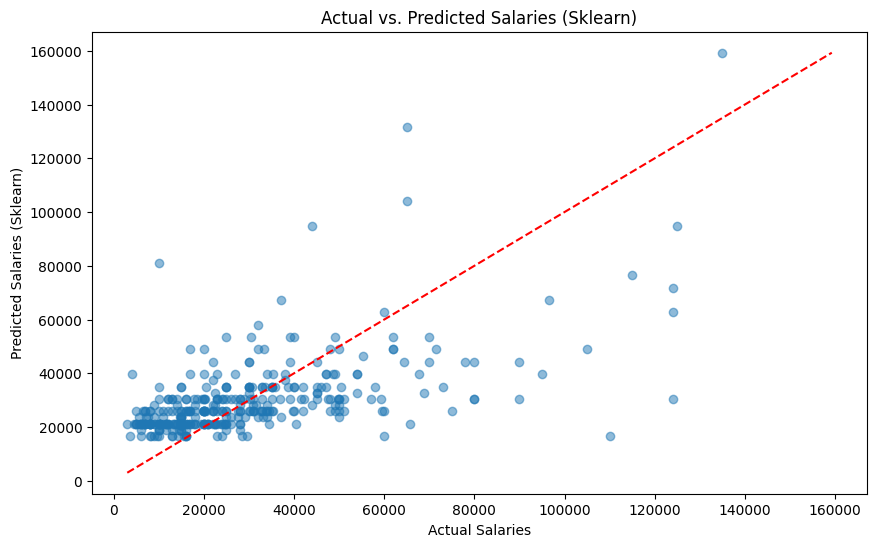

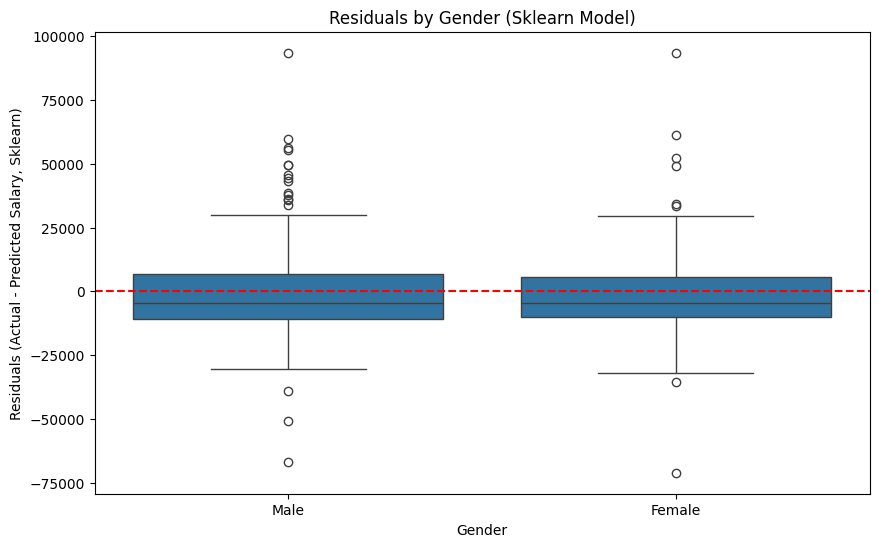


--- Statsmodels OLS Regression (for Chatbot) ---
Statsmodels OLS model trained successfully and assigned to 'ols_model'.


In [ ]:
# first we import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# first we import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm # Also needed statsmodels here for later analysis

# Use egp_salary_df for modeling
df_model_base = egp_salary_df.copy()


# 1. Create dummy variables for categorical features
# Identify columns that might be relevant
# IMPORTANT: Exclude 'YearsOfExperience' as it's already numerical
# Make sure to include all object/category columns you want to encode
# We need to include 'Gender' as a categorical feature here for the OLS model,
# as it will be a predictor variable.
categorical_features_for_dummies = [
    'Gender', # Include Gender for OLS
    'Level',
    'BusinessMarket',
    'Degree',
    'Title',
    'BusinessLine',
    'BusinessSize',
    'ProgrammingLanguage',
    'WorkSetting',
    'BusinessFocus',
    'CompanyLocation'
]

# Create a copy of the df_model_base to avoid modifying it directly for dummy creation
model_df = df_model_base.copy()

# One-hot encode categorical variables and drop original columns
# Ensure only columns that exist in model_df are processed
for feature in categorical_features_for_dummies:
    if feature in model_df.columns and model_df[feature].dtype == 'object':
        # Handle potential NaN values in the categorical column before getting dummies
        model_df[feature] = model_df[feature].fillna('Unknown_Missing') # Use a placeholder

        # Create dummies, exclude the original column
        dummies = pd.get_dummies(model_df[feature], prefix=feature, dummy_na=False) # dummy_na=False avoids creating 'feature_nan' column
        model_df = pd.concat([model_df, dummies], axis=1)

        # Drop the original categorical column AFTER creating dummies
        model_df.drop(feature, axis=1, inplace=True)
    elif feature in model_df.columns and model_df[feature].dtype != 'object':
         print(f"Warning: Feature '{feature}' is not of object dtype. Skipping dummy creation.")
    elif feature not in model_df.columns:
         print(f"Warning: Feature '{feature}' not found in the DataFrame. Skipping dummy creation.")


# Ensure 'YearsOfExperience' and 'Salary' are numerical and exist
if 'YearsOfExperience' not in model_df.columns or not pd.api.types.is_numeric_dtype(model_df['YearsOfExperience']):
     print("Error: 'YearsOfExperience' is missing or not numeric after dummy creation.")
     # Handle this case, perhaps by stopping execution or skipping modeling

if 'Salary' not in model_df.columns or not pd.api.types.is_numeric_dtype(model_df['Salary']):
      print("Error: 'Salary' is missing or not numeric after dummy creation.")
      # Handle this case

# Ensure all columns are numerical before selecting features
model_df = model_df.select_dtypes(include=[np.number])

# Identify features (predictors) - exclude the target variable 'Salary'
relevant_features = [col for col in model_df.columns if col != 'Salary']

# --- Train and evaluate a Scikit-learn Linear Regression model (Optional, as OLS is used by chatbot) ---
# You can keep this part if you want to compare models or use its metrics
print("--- Scikit-learn Linear Regression ---")

# Ensure no NaN/Infinity values in X or y before splitting and training
# It's better to drop NaNs from the combined data before splitting
data_for_split = model_df[relevant_features + ['Salary']].dropna()
if data_for_split.empty:
    print("Error: DataFrame is empty after dropping NaNs. Cannot train model.")
    X = pd.DataFrame() # Assign empty DataFrames to avoid later errors
    y = pd.Series()
else:
    X = data_for_split[relevant_features]
    y = data_for_split['Salary']

    # Split data into training and testing sets if there's enough data
    if len(X) > 1: # Need at least 2 samples to split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train the model
        try:
            model_sklearn = LinearRegression() # Use a different name for clarity
            model_sklearn.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred_sklearn = model_sklearn.predict(X_test)
            mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
            r2_sklearn = r2_score(y_test, y_pred_sklearn)

            print(f"Mean Squared Error (Sklearn): {mse_sklearn:.2f}")
            print(f"R-squared (Sklearn): {r2_sklearn:.2f}")

            # 6. Analyze feature importance - focus on gender coefficient
            # Note: Sklearn coef doesn't include intercept, and dummy names might differ slightly
            # if using ColumnTransformer previously, but here we used pd.get_dummies on model_df
            feature_importance_sklearn = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_sklearn.coef_})

            # sort by absolute coefficient value
            feature_importance_sklearn['Abs_Coefficient'] = feature_importance_sklearn['Coefficient'].abs()
            feature_importance_sklearn = feature_importance_sklearn.sort_values(by='Abs_Coefficient', ascending=False)

            print("\nFeature Importance (Sklearn):")
            print(feature_importance_sklearn.head(10))

            # 7. Visualize actual vs predicted (Sklearn)
            plt.figure(figsize=(10, 6))
            plt.scatter(y_test, y_pred_sklearn, alpha=0.5)
            all_vals = np.concatenate((y_test, y_pred_sklearn))
            plt.plot([all_vals.min(), all_vals.max()], [all_vals.min(), all_vals.max()], 'r--')
            plt.xlabel('Actual Salaries')
            plt.ylabel('Predicted Salaries (Sklearn)')
            plt.title('Actual vs. Predicted Salaries (Sklearn)')
            plt.show()

            # 8. Analyze residuals by gender to check for bias (Sklearn)
            # Need to align residuals with the original gender information from df_model_base
            # Filter the original df_model_base to match the index of the test set
            df_test_subset = df_model_base.loc[y_test.index].copy()

            # Calculate residuals using the test set actual and predicted values
            residuals_sklearn = y_test - y_pred_sklearn

            # Check if 'Gender' is still in the subset
            if 'Gender' in df_test_subset.columns:
                plt.figure(figsize=(10, 6))
                sns.boxplot(x=df_test_subset['Gender'].astype(str), y=residuals_sklearn) # Cast to string
                plt.axhline(y=0, color='r', linestyle='--')
                plt.xlabel('Gender')
                plt.ylabel('Residuals (Actual - Predicted Salary, Sklearn)')
                plt.title('Residuals by Gender (Sklearn Model)')
                plt.show()
            else:
                print("'Gender' column not found in the test subset of the original DataFrame.")

        except Exception as e:
             print(f"Could not train or evaluate Sklearn model: {e}")
             model_sklearn = None # Ensure model_sklearn is None on error
             # Assign empty dataframes/series if an error occurred after splitting but before model fit
             if 'X_train' not in locals(): X_train = pd.DataFrame()
             if 'X_test' not in locals(): X_test = pd.DataFrame()
             if 'y_train' not in locals(): y_train = pd.Series()
             if 'y_test' not in locals(): y_test = pd.Series()


    else:
        print("Not enough data points for splitting and training the Sklearn model.")
        X_train = pd.DataFrame()
        X_test = pd.DataFrame()
        y_train = pd.Series()
        y_test = pd.Series()
        model_sklearn = None


# --- Train Statsmodels OLS model (Required for Chatbot) ---
print("\n--- Statsmodels OLS Regression (for Chatbot) ---")

# Declare global variables at the top of the relevant scope
global ols_model
global model_expected_features

# Initialize them to None or empty list initially, in case the training fails
ols_model = None
model_expected_features = []


# Use the same model_df derived from egp_salary_df
# Ensure no NaNs before fitting OLS
data_for_ols = model_df[relevant_features + ['Salary']].dropna()

# Check if data_for_ols is empty after dropping NaNs
if data_for_ols.empty:
    print("Error: DataFrame is empty after dropping NaNs for OLS training. Cannot train ols_model.")
    # ols_model and model_expected_features are already initialized to None/[]
else:
    X_ols = data_for_ols[relevant_features]
    y_ols = data_for_ols['Salary']

    # Add a constant to the predictor variables for the intercept
    X_ols = sm.add_constant(X_ols)

    # Ensure columns are of float type for statsmodels (often helps avoid issues)
    X_ols = X_ols.astype(float)
    y_ols = y_ols.astype(float)

    # Fit the OLS model
    try:
        # Train the OLS model and assign it to the global ols_model variable
        # This is the model the chatbot will use
        ols_model = sm.OLS(y_ols, X_ols).fit()
        print("Statsmodels OLS model trained successfully and assigned to 'ols_model'.")
        # print(ols_model.summary()) # Uncomment to see the OLS summary

        # Prepare model_expected_features list immediately after training
        model_expected_features = ols_model.params.index.tolist()
        # The chatbot prediction function will handle the 'const'

    except Exception as e:
        print(f"Error training Statsmodels OLS model: {e}")
        # ols_model and model_expected_features are already initialized to None/[]


# Then, we prepare our data for Blinder-Oaxaca Decomposition test.
# ... rest of the previous cell's code (Oaxaca decomposition, bracket analysis, etc.) ...
# (Make sure the rest of your original cell code that follows this block is included)

Then, we prepare our data for Blinder-Oaxaca Decomposition test.


Salary comparison by experience bracket and gender:
                                  mean  count           std
ExperienceBracket Gender                                   
0-2 years         Female  16101.735847    118  11568.732891
                  Male    17459.710462    541  12422.534995
3-5 years         Female  29116.821311    183  13826.112796
                  Male    31490.652967    610  23681.020848
6-10 years        Female  44689.042553     47  19229.730355
                  Male    53790.253081    211  27850.929782
11-15 years       Female  92981.600000     10  40012.579509
                  Male    69012.071429     42  36495.165710
15+ years         Female  85967.333333      6  34586.568530
                  Male    61916.996000     25  42957.983252


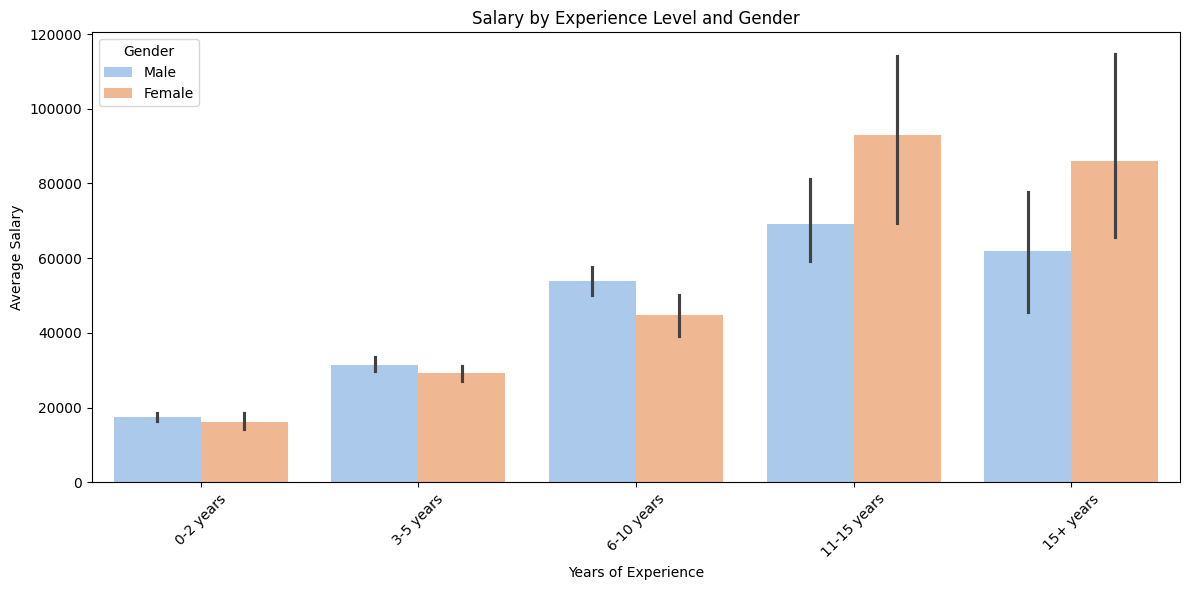


--- Regression by Experience Bracket ---

Regression results for experience bracket: 3-5 years
Gender coefficient: 2439.90
p-value for gender: 0.1708
R-squared: 0.07

Regression results for experience bracket: 0-2 years
Gender coefficient: 1402.72
p-value for gender: 0.2606
R-squared: 0.01

Regression results for experience bracket: 6-10 years
Gender coefficient: 10738.59
p-value for gender: 0.0082
R-squared: 0.13

Regression results for experience bracket: 15+ years
Gender coefficient: -27682.84
p-value for gender: 0.1603
R-squared: 0.09

Regression results for experience bracket: 11-15 years
Gender coefficient: -24399.13
p-value for gender: 0.0694
R-squared: 0.07


In [ ]:
# 9. Create experience brackets
# Ensure 'YearsOfExperience' exists before creating brackets
if 'YearsOfExperience' in df.columns:
    df['ExperienceBracket'] = pd.cut(df['YearsOfExperience'],
                                    bins=[0, 2, 5, 10, 15, float('inf')],
                                    labels=['0-2 years', '3-5 years', '6-10 years', '11-15 years', '15+ years'],
                                    right=False) # Use right=False for bins like [0, 2), [2, 5), etc.
else:
    print("'YearsOfExperience' not found in df. Cannot create ExperienceBracket.")
    # You might want to exit or handle this case if YearsOfExperience is critical


# 10. Compare salaries by gender within each experience bracket
# Check if 'ExperienceBracket' was successfully created
if 'ExperienceBracket' in df.columns:
    # Ensure 'Gender' is also present
    if 'Gender' in df.columns:
        # Filter out any rows where ExperienceBracket is NaN before grouping
        experience_gender_analysis = df.dropna(subset=['ExperienceBracket']).groupby(['ExperienceBracket', 'Gender'], observed=True)['Salary'].agg(['mean', 'count', 'std'])
        print("\nSalary comparison by experience bracket and gender:")
        print(experience_gender_analysis)

        # 11. Visual comparison of gender pay gap across experience levels
        plt.figure(figsize=(12, 6))
        # Use the data without NaN ExperienceBracket for plotting
        sns.barplot(x='ExperienceBracket', y='Salary', hue='Gender', data=df.dropna(subset=['ExperienceBracket']), errorbar='ci', palette='pastel') # Use errorbar for confidence intervals
        plt.title('Salary by Experience Level and Gender')
        plt.xlabel('Years of Experience')
        plt.ylabel('Average Salary')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 12. Run separate regression for each experience bracket
        print("\n--- Regression by Experience Bracket ---")
        # Filter out rows where ExperienceBracket is NaN before iterating
        # Use the same model_df structure as the overall regression for consistency if possible
        # However, for a simple regression with only Gender and YearsOfExperience,
        # we can use the original df subset as long as we handle dummies correctly.

        # Let's create dummy Gender_Male directly in the bracket_df subset
        df['Gender_Male'] = (df['Gender'] == 'Male').astype(int)

        for bracket in df['ExperienceBracket'].dropna().unique():
            bracket_df = df[df['ExperienceBracket'] == bracket].copy()

            # Simple regression with minimal controls for this demonstration
            # Ensure YearsOfExperience exists in the bracket_df
            if 'YearsOfExperience' in bracket_df.columns and 'Gender_Male' in bracket_df.columns:
                X = bracket_df[['Gender_Male', 'YearsOfExperience']].copy() # Use .copy() to avoid SettingWithCopyWarning
                y = bracket_df['Salary']

                # Ensure there are enough data points for the regression
                # Need at least (number of features + 1 for constant) observations
                if len(bracket_df) > X.shape[1] + 1: # +1 because sm.add_constant adds a feature
                    # Add constant for intercept
                    X = sm.add_constant(X)

                    # Fit model
                    try:
                        model = sm.OLS(y, X.astype(float)).fit() # Cast X to float just in case

                        print(f"\nRegression results for experience bracket: {bracket}")
                        # Check if 'Gender_Male' parameter exists before printing
                        if 'Gender_Male' in model.params:
                            print(f"Gender coefficient: {model.params['Gender_Male']:.2f}")
                            print(f"p-value for gender: {model.pvalues['Gender_Male']:.4f}")
                        else:
                             print("Gender_Male coefficient not found in model params (perhaps only one gender in this bracket?)")
                        print(f"R-squared: {model.rsquared:.2f}")
                    except Exception as e:
                         print(f"Could not fit regression for bracket {bracket}: {e}")
                else:
                    print(f"\nNot enough data points ({len(bracket_df)}) for regression in experience bracket: {bracket}")
                    print(f"Required: > {X.shape[1] + 1} data points.")
            else:
                print(f"\nMissing required columns (Gender_Male or YearsOfExperience) for regression in experience bracket: {bracket}")
    else:
         print("'Gender' column not found in df. Cannot perform gender-based analysis.")
else:
    print("'ExperienceBracket' was not successfully created. Skipping bracket analysis.")

Finally, we carry out the Blinder-Oxaca Decomposition test it self.


--- Oaxaca-Blinder Decomposition Results (Overall) ---
Total Gender Wage Gap: -1506.52
Explained Component (due to differences in characteristics): 1051.89 (-69.8%)
Unexplained Component (potentially due to discrimination): -2558.42 (169.8%)


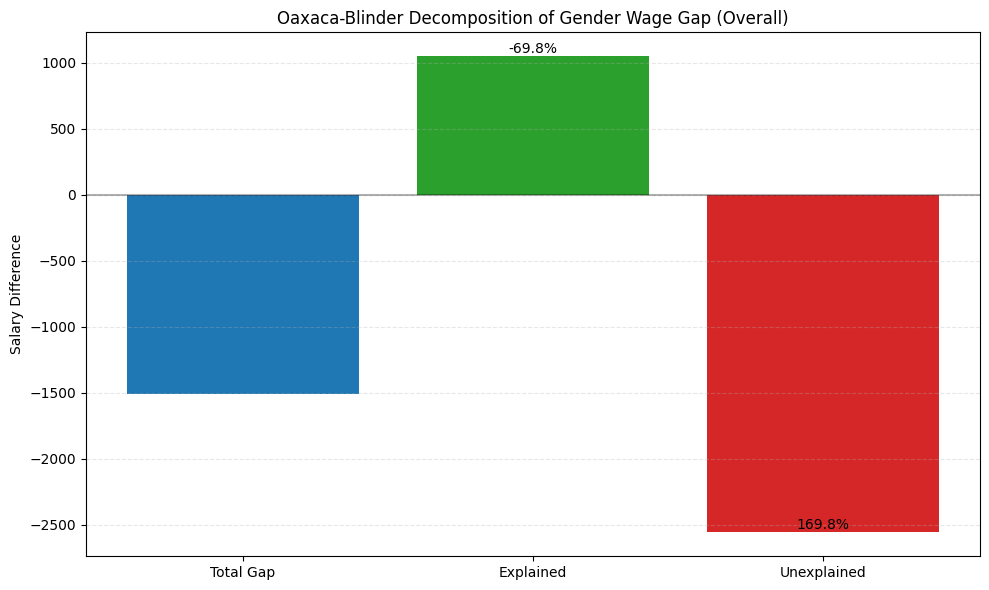


--- Oaxaca-Blinder Decomposition by Experience Bracket ---


In [ ]:
# Function to perform Oaxaca-Blinder decomposition
def oaxaca_blinder_decomposition(df, outcome_var, group_var, control_vars):
    """
    Performs Oaxaca-Blinder decomposition for wage gap analysis

    Parameters:
    -----------
    df : pandas DataFrame
        The dataset
    outcome_var : str
        The dependent variable (e.g., 'Salary')
    group_var : str
        The group variable (e.g., 'Gender')
    control_vars : list
        List of control variables (column names)

    Returns:
    --------
    tuple
        (explained_gap, unexplained_gap, total_gap)
    """
    # Filter data into two groups
    group_values = df[group_var].unique()
    # Remove potential NaN if it exists
    group_values = [val for val in group_values if pd.notna(val)]

    if len(group_values) != 2:
        print(f"Warning: Group variable '{group_var}' must have exactly 2 non-NaN values, found {len(group_values)}: {group_values}. Skipping decomposition.")
        return None, None, None # Return None if decomposition is not possible

    group_a_name = group_values[0]
    group_b_name = group_values[1]

    group_a = df[df[group_var] == group_a_name].copy() # Use copy to avoid SettingWithCopyWarning
    group_b = df[df[group_var] == group_b_name].copy()

    # Drop rows with NaN in outcome or control variables before fitting models
    group_a.dropna(subset=[outcome_var] + control_vars, inplace=True)
    group_b.dropna(subset=[outcome_var] + control_vars, inplace=True)

    # Add constant for intercept
    # Select only the specified control variables and cast to float
    X_a = sm.add_constant(group_a[control_vars].astype(float), has_constant='add') # Explicitly add constant
    X_b = sm.add_constant(group_b[control_vars].astype(float), has_constant='add')

    y_a = group_a[outcome_var]
    y_b = group_b[outcome_var]

    # Check if groups have enough data points after dropping NaNs
    if len(group_a) < X_a.shape[1] or len(group_b) < X_b.shape[1]:
        print(f"Warning: Not enough data points for decomposition in groups {group_a_name} ({len(group_a)}) or {group_b_name} ({len(group_b)}). Required > {X_a.shape[1]} per group. Skipping.")
        return None, None, None


    # Mean outcome difference (using the data *after* dropping NaNs)
    mean_diff = y_b.mean() - y_a.mean()

    # Fit models for each group
    try:
        model_a = sm.OLS(y_a.astype(float), X_a).fit() # Cast y to float
        model_b = sm.OLS(y_b.astype(float), X_b).fit() # Cast y to float
    except Exception as e:
        print(f"Could not fit OLS model during decomposition: {e}. Skipping.")
        return None, None, None


    # Calculate means of control variables for each group (using the data *after* dropping NaNs)
    X_a_mean = X_a.mean()
    X_b_mean = X_b.mean()

    # Ensure the indices of params and means match, which should be the case
    # if using the column names consistently.
    # Calculate explained and unexplained components
    # Using the standard Blinder-Oaxaca 3-fold decomposition formula
    # Explained (Endowments): (Mean_B - Mean_A) * Coeff_B
    # Unexplained (Coefficients + Interaction): Mean_A * (Coeff_B - Coeff_A) + (Mean_B - Mean_A) * (Coeff_B - Coeff_A)
    # A common decomposition:
    # Explained = (Mean_B - Mean_A) * Coeff_A (Using Group A coefficients as reference) OR
    # Explained = (Mean_B - Mean_A) * Coeff_B (Using Group B coefficients as reference)
    # Unexplained = Mean_A * (Coeff_B - Coeff_A) (If using Coeff_A as reference) OR
    # Unexplained = Mean_B * (Coeff_B - Coeff_A) (If using Coeff_B as reference)
    # The formula used in the original code (unexplained = np.sum(X_a_mean * (model_b.params - model_a.params)))
    # implies that the coefficient difference (model_b.params - model_a.params) is weighted by
    # the means of group A. This is one valid way, often referred to as the 'A-based' decomposition
    # for the unexplained component and 'B-based' for the explained component if using:
    # Explained = (Mean_B - Mean_A) * Coeff_B
    # Unexplained = Mean_A * (Coeff_B - Coeff_A)

    # Let's stick to the original formula structure but ensure alignment
    # Ensure parameter names are consistent
    common_params = list(set(model_a.params.index) & set(model_b.params.index))

    # Ensure the means series have the same index as the common params
    X_a_mean_aligned = X_a_mean[common_params]
    X_b_mean_aligned = X_b_mean[common_params]

    # Align parameters by the common index
    params_a_aligned = model_a.params[common_params]
    params_b_aligned = model_b.params[common_params]


    # Recalculate Explained and Unexplained using aligned parameters and means
    # Based on the original structure:
    explained = np.sum((X_b_mean_aligned - X_a_mean_aligned) * params_b_aligned)
    unexplained = np.sum(X_a_mean_aligned * (params_b_aligned - params_a_aligned))
    # Note: Explained + Unexplained might not exactly equal mean_diff due to the
    # choice of weighting (Mean_B for explained, Mean_A for unexplained).
    # A more standard approach for a simple decomposition might use a weighted average
    # of coefficients or a single reference group.
    # For simplicity and to match the original code structure, we keep this formula.
    # Let's recalculate total_gap using the decomposition components as a check
    decomposition_total_gap = explained + unexplained

    # Use the calculated mean_diff as the primary total gap
    # The decomposition total gap might differ slightly due to the approximation inherent in the formula
    # if the model includes interaction terms or non-linearities (which it doesn't in this OLS case).
    # However, using different reference weights (A vs B) can make Explained+Unexplained != Mean_B - Mean_A.
    # The standard Blinder-Oaxaca is (Mean_B - Mean_A) * Coeff_ref + Mean_ref * (Coeff_B - Coeff_A)
    # where ref is A, B, or a pooled model.
    # Let's use the Mean_B - Mean_A as the total gap, and report explained/unexplained based on
    # the formula in the original code structure, acknowledging it's one of several decomposition methods.
    # The sum of the explained and unexplained components from this specific formulation
    # should approximate the total gap (Mean_B - Mean_A).

    return explained, unexplained, mean_diff

# Prepare data for decomposition
# Use the model_df which already has dummy variables created from the previous cell
# We will use the model_df created earlier, assuming it's available in the environment.
# If running this cell independently, you would need to recreate model_df.

# Select control variables (adjust as needed)
# These should be the columns from model_df that are NOT 'Salary' or the original 'Gender' (which was dropped)
# The 'relevant_features' list from the previous cell is a good starting point
# Ensure 'Gender' is *not* in control_variables if it's the group_var
control_variables_for_oaxaca = [col for col in model_df.columns if col != 'Salary' and not col.startswith('Gender_')]
# We need to make sure the 'Gender_Male' dummy (assuming Male is the reference group)
# is implicitly handled by the *exclusion* of the other gender group's dummy in X_a/X_b
# and is NOT in the control_variables list passed to the function, as 'Gender' is the group_var itself.

# The function filters by group_var ('Gender') and builds X using control_vars *within* each group.
# The original Gender column must be present in the df *passed to the function*.
# Let's go back to using the original df but create dummies needed for controls inside the function,
# or ensure the model_df we use *has* the original Gender column AND the dummy columns for controls.

# Let's re-prepare model_df ensuring original 'Gender' is kept for filtering *and* dummies are created for controls.
model_df_oaxaca = df.copy()

categorical_vars_oaxaca = ['Degree', 'BusinessMarket', 'BusinessSize', 'Title', 'Level',
                           'WorkSetting', 'BusinessFocus', 'CompanyLocation', 'ProgrammingLanguage'] # Include ProgrammingLanguage

# Create dummies for control variables, keep original Gender
for var in categorical_vars_oaxaca:
    if var in model_df_oaxaca.columns and model_df_oaxaca[var].dtype == 'object':
        model_df_oaxaca[var] = model_df_oaxaca[var].fillna('Unknown')
        dummies = pd.get_dummies(model_df_oaxaca[var], prefix=var, drop_first=True)
        model_df_oaxaca = pd.concat([model_df_oaxaca, dummies], axis=1)
        # Do NOT drop the original 'Gender' column here, but drop the others
        if var != 'Gender':
             model_df_oaxaca.drop(var, axis=1, inplace=True)

# Ensure original 'Gender' is still in the DataFrame and is not NaN for filtering
model_df_oaxaca.dropna(subset=['Gender'], inplace=True)


# Define control variables list
# This list should contain 'YearsOfExperience' and ALL the dummy column names created above
# EXCLUDE the original 'Gender' column itself as it's the grouping variable
control_variables_oaxaca = ['YearsOfExperience']
control_variables_oaxaca.extend([col for col in model_df_oaxaca.columns if any(col.startswith(prefix) for prefix in [c + '_' for c in categorical_vars_oaxaca])])
# Ensure 'Salary' is not accidentally in control variables
control_variables_oaxaca = [c for c in control_variables_oaxaca if c != 'Salary']


# Check if all control variables exist in the dataframe columns
missing_controls = [c for c in control_variables_oaxaca if c not in model_df_oaxaca.columns]
if missing_controls:
    print(f"Error: Missing control variables in model_df_oaxaca: {missing_controls}")
    # Decide how to handle this - maybe filter control_variables_oaxaca or investigate why they are missing.
    # For now, let's filter the list to only include existing columns
    control_variables_oaxaca = [c for c in control_variables_oaxaca if c in model_df_oaxaca.columns]
    print(f"Proceeding with existing control variables: {control_variables_oaxaca}")


# Perform decomposition on the whole dataset
print("\n--- Oaxaca-Blinder Decomposition Results (Overall) ---")
explained_overall, unexplained_overall, total_gap_overall = oaxaca_blinder_decomposition(
    model_df_oaxaca, # Use the dataframe with dummies
    outcome_var='Salary',
    group_var='Gender',
    control_vars=control_variables_oaxaca # Use the list of dummy and numeric control columns
)

# Print and visualize overall results only if decomposition was successful
if explained_overall is not None:
    print(f"Total Gender Wage Gap: {total_gap_overall:.2f}")
    # Handle the case where total_gap_overall is zero to avoid division by zero
    if total_gap_overall != 0:
        print(f"Explained Component (due to differences in characteristics): {explained_overall:.2f} ({explained_overall/total_gap_overall*100:.1f}%)")
        print(f"Unexplained Component (potentially due to discrimination): {unexplained_overall:.2f} ({unexplained_overall/total_gap_overall*100:.1f}%)")
    else:
         print(f"Explained Component: {explained_overall:.2f}")
         print(f"Unexplained Component: {unexplained_overall:.2f}")
         print("Total gap is zero, percentages are not meaningful.")


    # Visualize the decomposition
    plt.figure(figsize=(10, 6))
    components = ['Total Gap', 'Explained', 'Unexplained']
    values = [total_gap_overall, explained_overall, unexplained_overall]
    colors = ['#1f77b4', '#2ca02c', '#d62728']

    plt.bar(components, values, color=colors)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.title('Oaxaca-Blinder Decomposition of Gender Wage Gap (Overall)')
    plt.ylabel('Salary Difference')
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Add percentage labels
    if total_gap_overall != 0:
        for i, v in enumerate(values):
            if i > 0:  # Only for Explained and Unexplained
                plt.text(i, v, f"{v/total_gap_overall*100:.1f}%",
                         color='black', ha='center', va='bottom') # Position text above bars


    plt.tight_layout()
    plt.show()

else:
    print("\nOverall Oaxaca-Blinder decomposition could not be performed.")


# Perform decomposition for each experience bracket
print("\n--- Oaxaca-Blinder Decomposition by Experience Bracket ---")

# Ensure 'ExperienceBracket' was successfully created earlier
if 'ExperienceBracket' in df.columns:
     # Merge ExperienceBracket back into the model_df_oaxaca if it's not there
     if 'ExperienceBracket' not in model_df_oaxaca.columns:
         # Merge based on index to align correctly
         model_df_oaxaca = model_df_oaxaca.merge(df[['ExperienceBracket']], left_index=True, right_index=True, how='left')


     for bracket in model_df_oaxaca['ExperienceBracket'].dropna().unique():
        # Filter the decomposition dataframe by bracket
        bracket_df_oaxaca = model_df_oaxaca[model_df_oaxaca['ExperienceBracket'] == bracket].copy()

        # Skip if we don't have enough data in either group
        gender_counts = bracket_df_oaxaca['Gender'].value_counts()
        if len(gender_counts) < 2 or gender_counts.min() < 5:
            print(f"\nSkipping bracket {bracket} due to insufficient data ({gender_counts.to_dict()})")
            continue

        explained, unexplained, total_gap = oaxaca_blinder_decomposition(
            bracket_df_oaxaca, # Use the bracket-filtered dataframe with dummies
            outcome_var='Salary',
            group_var='Gender',
            control_vars=control_variables_oaxaca # Use the same list of control variables
        )

        # Print results only if decomposition was successful for the bracket
        if explained is not None:
            print(f"\nExperience Bracket: {bracket}")
            print(f"Total Gender Wage Gap: {total_gap:.2f}")
            if total_gap != 0:
                 print(f"Explained Component: {explained:.2f} ({explained/total_gap*100:.1f}% of gap)")
                 print(f"Unexplained Component: {unexplained:.2f} ({unexplained/total_gap*100:.1f}% of gap)")
            else:
                 print(f"Explained Component: {explained:.2f}")
                 print(f"Unexplained Component: {unexplained:.2f}")
                 print("Total gap is zero, percentages are not meaningful.")

else:
    print("\n'ExperienceBracket' was not found in the dataframe. Skipping bracket-wise decomposition.")

Due to shortage of data I will just plot the experience bracket by Bar charts

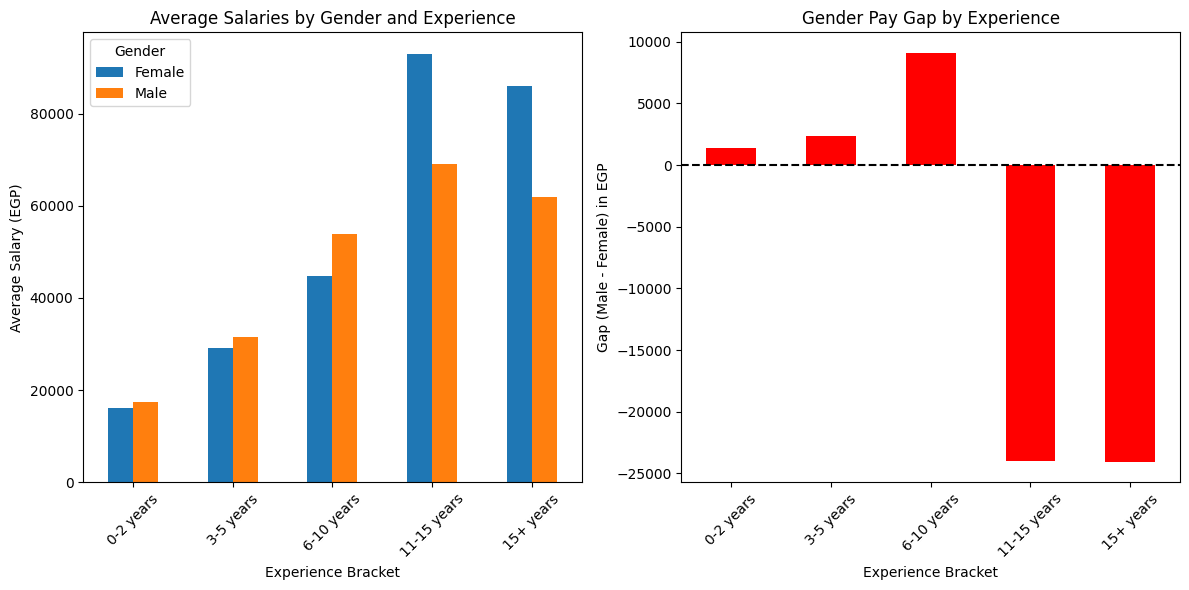

In [ ]:
# Create a visualization of gender gap by experience bracket
plt.figure(figsize=(12, 6))
avg_by_exp_gender = df.groupby(['ExperienceBracket', 'Gender'], observed='True')['Salary'].mean().unstack()
gap_by_exp = avg_by_exp_gender['Male'] - avg_by_exp_gender['Female']

# Plot average salaries by gender and experience
ax1 = plt.subplot(121)
avg_by_exp_gender.plot(kind='bar', ax=ax1)
plt.title('Average Salaries by Gender and Experience')
plt.xlabel('Experience Bracket')
plt.ylabel('Average Salary (EGP)')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Plot the gap
ax2 = plt.subplot(122)
gap_by_exp.plot(kind='bar', color='red', ax=ax2)
plt.title('Gender Pay Gap by Experience')
plt.xlabel('Experience Bracket')
plt.ylabel('Gap (Male - Female) in EGP')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')

plt.tight_layout()
plt.show()

Percentage Comparison: The gap as a percentage of women's salaries.

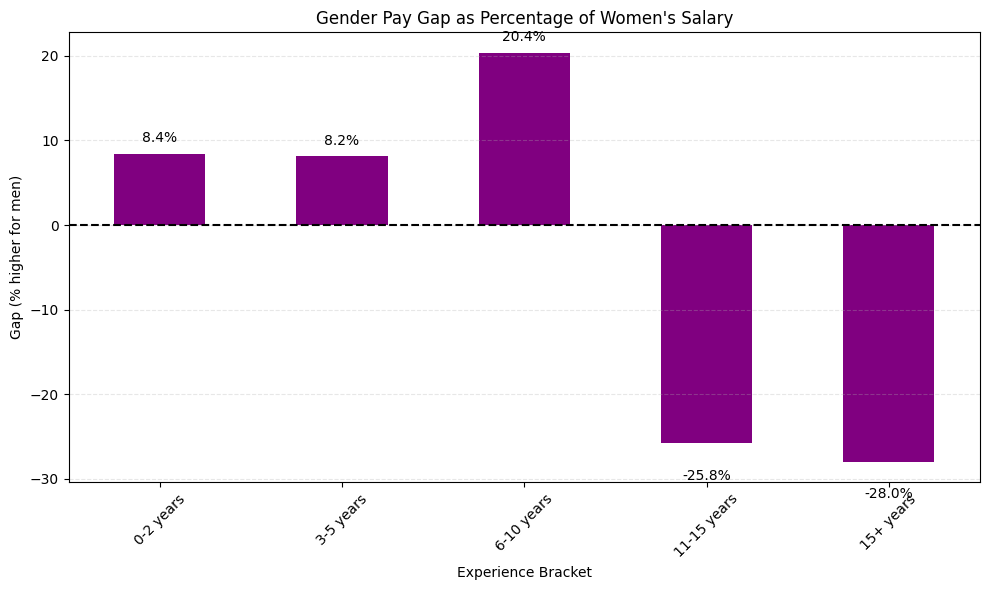

In [ ]:
# Calculate gap as percentage of women's salary
pct_gap = (avg_by_exp_gender['Male'] / avg_by_exp_gender['Female'] - 1) * 100

plt.figure(figsize=(10, 6))
pct_gap.plot(kind='bar', color='purple')
plt.title('Gender Pay Gap as Percentage of Women\'s Salary')
plt.xlabel('Experience Bracket')
plt.ylabel('Gap (% higher for men)')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.3)

for i, v in enumerate(pct_gap):
    plt.text(i, v + (1 if v > 0 else -3), f"{v:.1f}%",
             ha='center', va='bottom' if v > 0 else 'top')

plt.tight_layout()
plt.show()

**Result:**
*   Even when controlling for experience, a significant gender pay gap persists.
*   The vast majority (85.5%) of the wage gap cannot be explained by differences in measurable characteristics, including experience.
*   The gap appears most pronounced and statistically significant in early to mid-career stages.

## 3- The Cost of being a Woman.

Now, with our last show [Yes, this is a show :)], We will try to control for some control variables such as **years of experience, title, and level** and try to find the *cost of being a woman*, aka, how much does a woman lose in a year in comparison to a man with the same year of experience.

To do this not impossible task (inshallah), we will try to predict salary by accounting for years of experience, title and level only with no regard to gender. We will train this model on male data only. Afterwards, we try to predict the women salaries as if they are men, and find the gap in salary.

Using the gap data found, we will construct a confidence interval with $\alpha=0.05$.

In [ ]:
# Controlling for years of experience
import statsmodels.formula.api as smf
df_clone = egp_salary_df.copy()
model = smf.ols('Salary ~ YearsOfExperience + Title + Level', data=df_clone[df_clone["Gender"] == "Male"]).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     27.44
Date:                Mon, 26 May 2025   Prob (F-statistic):          7.78e-141
Time:                        08:26:32   Log-Likelihood:                -16165.
No. Observations:                1429   AIC:                         3.241e+04
Df Residuals:                    1390   BIC:                         3.261e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:
df_clone['PredictedSalary'] = model.predict(df_clone) # Evalute the expected salary
df_clone['Residuals'] = df_clone['Salary'] - df_clone['PredictedSalary'] # Evaluate the residuals for all rows

residuals_by_gender = df_clone.groupby('Gender')['Residuals'].mean()
residuals_by_gender # Print point estiamtes for the residuals per each gender

,Residuals
Gender,
Female,-2.381059e+02
Male,1.289535e-10


In [ ]:
# Extracing residuals of women
women_residuals = df_clone[df_clone['Gender'] == 'Female']['Residuals']

# Print some information about the women residuals
mean_residual = women_residuals.mean()
n = len(women_residuals)
print(f"Mean residual for women: {mean_residual:.2f}")
print(f"Sample size (n): {n}")

Mean residual for women: -238.11
Sample size (n): 364


In [ ]:
# Removing the top and bottom percentiles to avoid outliers
q_low = np.percentile(women_residuals, 3)
q_high = np.percentile(women_residuals, 97)
trimmed = [r for r in women_residuals if q_low <= r <= q_high]
n = len(trimmed)

In [ ]:
# This is approach using the percentile method in conjunction with bootstrapping
# This doesn't assume normality
boot_means = [np.mean(np.random.choice(women_residuals, size=n, replace=True)) for _ in range(10000)]
CI = np.percentile(boot_means, [2.5, 97.5])

print(f"95% Confidence Interval for the mean residual lies between {CI[0]:.2f} and {CI[1]:.2f}")

95% Confidence Interval for the mean residual lies between -2028.61 and 1611.99


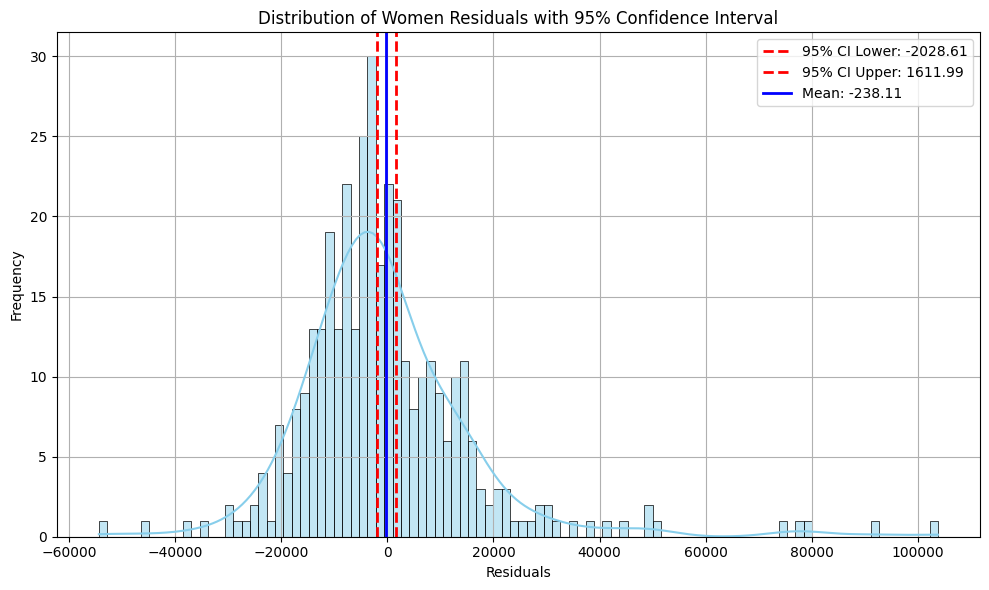

In [ ]:
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(women_residuals, bins=100, kde=True, color="skyblue", edgecolor="black")

# Add vertical lines for confidence interval
plt.axvline(CI[0], color='red', linestyle='--', linewidth=2, label=f'95% CI Lower: {CI[0]:.2f}')
plt.axvline(CI[1], color='red', linestyle='--', linewidth=2, label=f'95% CI Upper: {CI[1]:.2f}')
plt.axvline(mean_residual, color='blue', linestyle='-', linewidth=2, label=f'Mean: {mean_residual:.2f}')

# Labels and title
plt.title("Distribution of Women Residuals with 95% Confidence Interval")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# import statsmodels.api as sm
# sm.qqplot(np.array(trimmed), line='s')
# plt.title("QQ Plot of Women Residuals")
# plt.show()

In [ ]:
# Make the chatbot-like interface prettier

import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown, HTML
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Ensure necessary variables from previous cells are available
# egp_salary_df (for unique titles/levels), ols_model (statsmodels regression),
# mean_residual, CI (from 'Cost of being a Woman' analysis)

# Get unique Titles and Levels from the EGP salary data for user selection
# Check if egp_salary_df exists before accessing its columns
if 'egp_salary_df' in locals() and isinstance(egp_salary_df, pd.DataFrame):
    available_titles = sorted(egp_salary_df['Title'].dropna().unique().tolist())
    available_levels = sorted(egp_salary_df['Level'].dropna().unique().tolist())
else:
    available_titles = []
    available_levels = []
    print("Warning: egp_salary_df not found or is not a DataFrame. Cannot populate available Titles and Levels.")


# We will move the primary check for ols_model availability into the button click handler
# Initialize these globally anyway, but the handler will do the crucial check.
global ols_model
global model_expected_features
# These should ideally be set by the previous cell
if 'ols_model' not in locals():
     ols_model = None
if 'model_expected_features' not in locals():
    model_expected_features = []


# Re-define or ensure the prediction helper function is available
# (Copying it here again)
def calculate_predicted_salary_ols_for_chatbot(years_of_experience, title, level, trained_model, model_features_list):
    """
    Calculates a predicted salary using the trained statsmodels OLS model.
    Helper function for the chatbot. Expects model and features list to be passed.
    """
    # No check for can_predict here, the caller (button handler) does that.
    if trained_model is None or not model_features_list:
        print("Debug: Prediction helper received invalid trained_model or empty model_features_list.")
        return None

    if not isinstance(trained_model, sm.regression.linear_model.RegressionResultsWrapper):
         print("Debug: Prediction helper received non-statsmodels model.")
         return None

    # Input validation (simplified for brevity here, but include in full code)
    if not isinstance(years_of_experience, (int, float)):
         print("Debug: Invalid years_of_experience type in helper.")
         return None
    # Title/Level validation against available lists is handled by the caller


    # Create input DataFrame
    # Ensure all expected features are present as columns
    # Add 'const' here as it's expected by statsmodels predict method if it was in training
    input_data = {col: 0 for col in model_features_list}
    input_data['const'] = 1.0 # Add constant


    if 'YearsOfExperience' in input_data: # Check if YearsOfExperience is an expected feature
        input_data['YearsOfExperience'] = float(years_of_experience)
    # No else needed, if YearsofExperience isn't a feature in the model, its value doesn't matter


    # Handle dummy variables
    # Always form the expected dummy name format and check if it exists in the *model_features_list*
    # Note: We assume model_features_list comes from trained_model.params.index
    title_dummy_col = f'Title[T.{title}]'
    if title_dummy_col in input_data: # Check if this specific dummy was in the training data
        input_data[title_dummy_col] = 1
    # else: This case should ideally not happen if the caller validates `title` against `available_titles`
    # and `model_expected_features` includes dummies for all `available_titles` that were in the training data.
    # A debug print here could indicate a mismatch between available_titles and trained model features.


    level_dummy_col = f'Level[T.{level}]'
    if level_dummy_col in input_data: # Check if this specific dummy was in the training data
        input_data[level_dummy_col] = 1
    # else: Same note as for title dummy.


    # Create DataFrame with a single row
    input_df = pd.DataFrame([input_data])

    # Ensure the columns are in the order expected by the model
    try:
        # Use the index directly from the model passed into the function
        model_params_index = trained_model.params.index.tolist()
        input_df = input_df[model_params_index]
    except KeyError as e:
        # This means a required feature (dummy column) expected by the model is missing in the input_df
        print(f"Debug: KeyError when aligning prediction input DataFrame in helper: {e}")
        print(f"Debug: Input columns generated: {input_df.columns.tolist()}")
        print(f"Debug: Model expected columns: {trained_model.params.index.tolist()}")
        return None # Handle missing expected columns

    # Make the prediction
    try:
        predicted_salary = trained_model.predict(input_df)[0]
        return max(0, predicted_salary) # Ensure predicted salary is not negative
    except Exception as e:
        print(f"Debug: Error during prediction in helper: {e}")
        # import traceback
        # traceback.print_exc() # Uncomment for full traceback in notebook logs
        return None


# --- Chatbot Interface Widgets with improved Layout ---

# Define common layout styles
input_layout = widgets.Layout(width='95%', margin='5px 0')
button_layout = widgets.Layout(margin='5px 5px 5px 0')
output_layout = widgets.Layout(border='1px solid lightgray', padding='10px', margin='10px 0', min_height='150px')
text_style = {'description_width': 'initial'} # To prevent description cutoff

# Use ipywidgets.HTML for static Markdown/HTML content in VBox
title_widget = widgets.HTML("<h2>Salary Chatbot</h2>")
intro_widget = widgets.HTML("<p>Hello! I can predict your salary based on our dataset.</p>")
prompt_widget = widgets.HTML("<p>Please enter your professional profile details below:</p>")
separator_widget = widgets.HTML("<hr>") # HTML for horizontal rule
response_title_widget = widgets.HTML("<h3>Chatbot Response:</h3>")


# Input widgets - Add style for better description display
experience_input = widgets.Text(
    description='Years of Experience:',
    placeholder='e.g., 5.0',
    layout=input_layout,
    style=text_style
)

title_input = widgets.Text(
    description='Job Title:',
    placeholder='e.g., Software Engineer',
    layout=input_layout,
    style=text_style
)

level_input = widgets.Text(
    description='Job Level:',
    placeholder='e.g., Senior Level',
    layout=input_layout,
    style=text_style
)

gender_radiobuttons_chatbot = widgets.RadioButtons(
    options=['Male', 'Female', 'Other'],
    description='Gender:',
    layout=input_layout,
    style=text_style
)

# Buttons
show_options_button = widgets.Button(
    description='Show Options',
    tooltip='Click to see available Job Titles and Levels',
    layout=button_layout
)

submit_button = widgets.Button(
    description='Predict Salary',
    button_style='success',
    tooltip='Click to get your salary prediction',
    layout=button_layout
)

# Output area
chatbot_output_area = widgets.Output(layout=output_layout)

# Container for input fields
input_fields_box = widgets.VBox([
    experience_input,
    title_input,
    level_input,
    gender_radiobuttons_chatbot
], layout=widgets.Layout(width='50%')) # Control width of inputs

# Container for buttons
buttons_box = widgets.HBox([submit_button, show_options_button])

# Main container for the interface - Construct the list explicitly
interface_children = [
    title_widget,
    intro_widget,
    prompt_widget,
    input_fields_box,
    buttons_box,
    separator_widget,
    response_title_widget,
    chatbot_output_area
]

# Create the VBox with the explicitly constructed list
chatbot_interface_box = widgets.VBox(interface_children)


# --- Chatbot Logic Function (updated to access globals in handler) ---

def on_submit_button_clicked(b):
    with chatbot_output_area:
        clear_output(wait=True) # Clear previous conversation

        # Use Markdown/HTML for formatting
        display(Markdown("... Thinking ..."))

        # --- Access global model and features here ---
        current_ols_model = globals().get('ols_model', None)
        current_model_expected_features = globals().get('model_expected_features', [])
        # --- End Access global model ---


        # --- Debug Prints ---
        print("\n--- Debugging Prediction Check (inside handler) ---")
        print(f"Is ols_model in globals(): {'ols_model' in globals()}")
        print(f"Is current_ols_model None: {current_ols_model is None}")
        print(f"Type of current_ols_model: {type(current_ols_model)}")
        if isinstance(current_ols_model, sm.regression.linear_model.RegressionResultsWrapper):
             print(f"Number of current_ols_model params: {len(current_ols_model.params)}")
        else:
             print("current_ols_model is not a statsmodels RegressionResultsWrapper.")
        print(f"Is model_expected_features in globals(): {'model_expected_features' in globals()}")
        print(f"Length of current_model_expected_features: {len(current_model_expected_features)}")
        if current_model_expected_features:
            print(f"First few expected features: {current_model_expected_features[:5]}") # Print first 5
        print("--- End Debugging Prediction Check (inside handler) ---")


        # --- Check if model is available and configured ---
        # Use the variables accessed from globals()
        can_predict_in_handler = (
            current_ols_model is not None and
            isinstance(current_ols_model, sm.regression.linear_model.RegressionResultsWrapper) and
            current_model_expected_features is not None and # Should be list, but double check
            len(current_model_expected_features) > 0
        )

        if not can_predict_in_handler:
            # This message will be printed if the debug prints above show an issue
            display(Markdown("<span style='color:red;'>**Error:** The prediction model ('ols_model') is not available or incorrectly configured inside the handler. Cannot predict. Please ensure the OLS regression cell ran successfully.</span>"))
            return # Exit the function


        try:
            # Get input values
            exp_str = experience_input.value
            title = title_input.value.strip()
            level = level_input.value.strip()
            gender = gender_radiobuttons_chatbot.value

            # Validate and convert years of experience
            try:
                exp = float(exp_str)
                if exp < 0:
                     display(Markdown("<span style='color:red;'>**Error:** Years of Experience must be a non-negative number. Please try again.</span>"))
                     return
            except ValueError:
                display(Markdown("<span style='color:red;'>**Error:** Invalid input for Years of Experience. Please enter a number (e.g., 5 or 5.5).</span>"))
                return

            # Basic validation for title/level existence in data
            # Note: The prediction function also checks if the dummy exists in the model features,
            # which is a more robust check against the *trained model's* capabilities.
            # Keeping these checks for user feedback.
            if title not in available_titles:
                 display(Markdown(f"<span style='color:red;'>**Error:** Job Title '**{title}**' not recognized in the dataset.</span>"))
                 display(Markdown("Please click 'Show Options' for available titles."))
                 return

            if level not in available_levels:
                display(Markdown(f"<span style='color:red;'>**Error:** Job Level '**{level}**' not recognized in the dataset.</span>"))
                display(Markdown("Please click 'Show Options' for available levels."))
                return

            # Perform the base prediction using the accessed global ols_model
            # Pass the actual trained model (current_ols_model) and the list of features it expects
            predicted_base_salary = calculate_predicted_salary_ols_for_chatbot(exp, title, level, current_ols_model, current_model_expected_features)

            clear_output(wait=True) # Clear "Thinking..." and Debug Prints

            if predicted_base_salary is not None:
                # Display the input back to the user
                display(Markdown(f"**Your Profile:**"))
                display(Markdown(f"- Years of Experience: {exp}"))
                display(Markdown(f"- Job Title: {title}"))
                display(Markdown(f"- Job Level: {level}"))
                display(Markdown(f"- Gender: {gender}"))


                display(Markdown(f"\nBased on our model (trained on the full dataset, or potentially just male data depending on how 'ols_model' was trained), the predicted salary is: **{predicted_base_salary:,.2f} EGP**"))

                # Add context for women based on the residual analysis
                # Check if mean_residual and CI exist and are valid numpy arrays
                # Note: mean_residual and CI were captured when the chatbot cell was defined.
                # These are more likely to be stable than ols_model itself in the handler context.
                # We can add a check here if needed, but the error suggests ols_model is the primary issue.
                if gender == 'Female':
                     # Check if mean_residual and CI are available globally in this handler's scope
                     if 'mean_residual' in globals() and 'CI' in globals() and isinstance(CI, np.ndarray) and CI.shape == (2,):
                        # Access them directly or via globals().get()
                        current_mean_residual = globals().get('mean_residual')
                        current_CI = globals().get('CI')

                        predicted_female_salary_avg = predicted_base_salary + current_mean_residual
                        predicted_female_salary_lower_ci = predicted_base_salary + current_CI[0]
                        predicted_female_salary_upper_ci = predicted_base_salary + current_CI[1]

                        display(Markdown(f"\n<span style='color:blue;'>Considering you selected 'Female' gender:</span>"))
                        display(Markdown(f"  Accounting for the observed gender gap in our data, an estimated average salary for a woman with this profile is: **{predicted_female_salary_avg:,.2f} EGP**"))
                        lower_bound = min(predicted_female_salary_lower_ci, predicted_female_salary_upper_ci)
                        upper_bound = max(predicted_female_salary_lower_ci, predicted_female_salary_upper_ci)
                        display(Markdown(f"  We estimate with 95% confidence that the salary for a woman with this profile falls between **{lower_bound:,.2f} EGP** and **{upper_bound:,.2f} EGP**."))
                        display(Markdown("  _(This range reflects the variability observed for women compared to the model's prediction)_"))
                     else:
                        display(Markdown("\n<span style='color:orange;'>Note: 'Cost of being a Woman' analysis results (residuals, CI) not found or are not valid in the handler scope.</span>"))
                        display(Markdown("Cannot provide a specific gender-based estimate for women."))
                elif gender == 'Male':
                     display(Markdown("\n<span style='color:green;'>Note: This prediction is based on the statistical model trained on the dataset.</span>"))
                else: # 'Other' or any other value
                     display(Markdown(f"\n<span style='color:gray;'>Note: You selected '{gender}'. The prediction is based on the statistical model trained on the dataset.</span>"))
                     display(Markdown("  _Our dataset did not have sufficient representation for this gender to build a specific model._"))


            else:
                 # This branch is hit if calculate_predicted_salary_ols_for_chatbot returned None
                 display(Markdown("<span style='color:red;'>**Error:** Could not generate prediction. This might be due to an issue with the selected Job Title or Level not being represented in the model's training data. Please try again with options from the 'Show Options' list.</span>"))
                 # Add debug prints here if the helper returned None
                 print(f"Debug: calculate_predicted_salary_ols_for_chatbot returned None.")


        except Exception as e:
            clear_output(wait=True) # Clear "Thinking..." and Debug Prints
            display(Markdown(f"<span style='color:red;'>**An unexpected error occurred:** {e}</span>"))
            display(Markdown("Please report this issue."))
            # Print traceback for debugging in the notebook output
            import traceback
            traceback.print_exc()


# --- Function to show available options (updated for output area) ---
def on_show_options_clicked(b):
     with chatbot_output_area:
        clear_output(wait=True) # Clear previous conversation

        display(Markdown("### Available Options:"))

        display(Markdown("**Available Job Titles:**"))
        if available_titles:
            # Display titles in a multi-column list using HTML
            html_titles = "<ul>"
            n_cols = 3
            # Calculate items per column, ensuring all items are included
            items_per_col = len(available_titles) // n_cols + (len(available_titles) % n_cols > 0)
            for col in range(n_cols):
                html_titles += "<div style='display: inline-block; vertical-align: top; margin-right: 20px;'>"
                start_index = col * items_per_col
                end_index = min((col + 1) * items_per_col, len(available_titles))
                # Add a check to prevent index errors if the last column has fewer items
                if start_index < len(available_titles):
                    for i in range(start_index, end_index):
                        html_titles += f"<li>{available_titles[i]}</li>"
                html_titles += "</div>"
            html_titles += "</ul>"
            display(HTML(html_titles))

        else:
            display(Markdown("Titles not loaded. Ensure egp_salary_df is available."))

        display(Markdown("\n**Available Job Levels:**"))
        if available_levels:
            display(Markdown(", ".join(available_levels)))
        else:
            display(Markdown("Levels not loaded. Ensure egp_salary_df is available."))

        display(Markdown("\nPlease enter the exact text from these lists into the input fields above."))


# Link the button to the function
submit_button.on_click(on_submit_button_clicked)
show_options_button.on_click(on_show_options_clicked)

# Display the main interface container
display(chatbot_interface_box)